<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/TimeSeries/TimeSeries-2025/%D0%A2%D0%B5%D0%BC%D0%B0%202.%20%D0%94%D0%B5%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%B7%D0%B8%D1%86%D0%B8%D1%8F_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Декомпозиция временных рядов**

Декомпозиция временных рядов — это мощный аналитический инструмент, позволяющий разложить временной ряд на несколько составляющих компонентов: **тренд**, **сезонность** и **случайную составляющую** (остаток). Эта процедура помогает глубже понять внутреннюю структуру данных, выявить скрытые закономерности и, как следствие, улучшить качество прогнозирования. Понимание этих компонентов критически важно для эффективного анализа и моделирования временных рядов [17–19].



### **Основные подходы к декомпозиции**

Существует два основных подхода к декомпозиции временных рядов: **аддитивный** и **мультипликативный**. Выбор модели зависит от характера взаимодействия между компонентами.

#### **1. Аддитивная декомпозиция**

Аддитивная модель предполагает, что значение временного ряда в момент времени $t$ представляет собой сумму трёх компонентов. Эта модель применима, когда амплитуда сезонных колебаний и разброс случайной составляющей остаются примерно постоянными на протяжении всего ряда, независимо от уровня тренда.

**Формула аддитивной модели:**
$$
y_t = T_t + S_t + R_t
$$

**Где:**
- $y_t$ — наблюдаемое значение временного ряда в момент времени $t$;
- $T_t$ — трендовая компонента, отражающая долгосрочную тенденцию;
- $S_t$ — сезонная компонента, описывающая регулярные, повторяющиеся колебания;
- $R_t$ — случайная составляющая (остаток), включающая шум и необъяснённые колебания.

**Пример применения аддитивной модели:**

Рассмотрим данные о продажах мороженого в небольшом киоске. Если продажи ежегодно растут (восходящий тренд), но сезонный прирост летом остаётся примерно одинаковым по абсолютной величине (например, на 500 порций больше, чем зимой), независимо от общего объёма продаж, то аддитивная модель будет наиболее подходящей.



#### **2. Мультипликативная декомпозиция**

Мультипликативная модель предполагает, что значение временного ряда формируется как произведение компонентов. Она используется, когда амплитуда сезонных колебаний и разброс случайной составляющей изменяются пропорционально уровню тренда: чем выше тренд, тем больше абсолютные значения сезонных и случайных отклонений.

**Формула мультипликативной модели:**
$$
y_t = T_t \times S_t \times R_t
$$

Для упрощения анализа мультипликативную модель часто преобразуют в аддитивную с помощью логарифмирования. Это позволяет применять стандартные методы декомпозиции.

**Логарифмическое преобразование:**
$$
\log(y_t) = \log(T_t) + \log(S_t) + \log(R_t)
$$

**Пример применения мультипликативной модели:**

Рассмотрим данные о продажах крупной онлайн-платформы. Если с ростом компании (восходящий тренд) сезонные пики в праздничные дни увеличиваются не на фиксированную величину, а в несколько раз (например, в 1.5 раза по сравнению с базовым уровнем), то мультипликативная модель будет более адекватной.



### **Декомпозиция на основе скользящего среднего**

Одним из классических методов декомпозиции является подход, основанный на **скользящем среднем**. Для его применения необходимо заранее знать **период сезонности** $s$ (часто обозначается как $s$ или $\text{cycle}$). Этот параметр определяет частоту повторения сезонного паттерна и критически важен для корректного выделения компонент.

**Типичные значения периода сезонности:**
- Для **ежемесячных данных**: $s = 12$ (годовая сезонность);
- Для **ежеквартальных данных**: $s = 4$;
- Для **ежедневных данных** с недельной сезонностью: $s = 7$;
- Для **ежедневных данных** с годовой сезонностью: $s = 365$.



### **От чего зависит период сезонности $s$?**

Период сезонности не вычисляется автоматически из данных, а определяется на основе **предметной области** и **характера процесса**. Основные факторы, влияющие на выбор $s$:

- **Частота сбора данных:**
  - Ежедневные данные могут демонстрировать сезонность с периодом 7 (недельная), 30/31 (месячная) или 365 (годовая).
  - Ежемесячные данные чаще всего имеют сезонность с периодом 12 (годовая).

- **Природа явления:**
  - **Недельная сезонность** ($s = 7$): характерна для розничных продаж, трафика в приложениях, потребления энергии (пики в выходные).
  - **Годовая сезонность** ($s = 12$ или $s = 365$): наблюдается в продажах сезонных товаров (мороженое, отопление), туристических потоках, сельскохозяйственных данных.
  - **Квартальная сезонность** ($s = 4$): типична для финансовой отчётности компаний.
  - **Суточная сезонность** ($s = 24$): актуальна для потребления электроэнергии, интернет-трафика, звонков в колл-центр.

- **Календарные и культурные события:**
  - Повторяющиеся события, такие как Новый год, Рождество, Пасха, школьные каникулы или распродажи (например, Black Friday), могут формировать дополнительные сезонные паттерны.



### **Пример декомпозиции временного ряда на основе скользящего среднего**

#### **Исходные данные: Ежедневные продажи мороженого**

Предположим, что у нас есть данные о ежедневных продажах мороженого за 14 дней. Мы предполагаем наличие **недельной сезонности**, то есть период сезонности $s = 7$. Цель — выполнить декомпозицию ряда с использованием метода скользящего среднего.

| День (t) | День недели | Продажи ($y_t$) |
|---------|-------------|------------------|
| 1       | Пн          | 100              |
| 2       | Вт          | 110              |
| 3       | Ср          | 95               |
| 4       | Чт          | 120              |
| 5       | Пт          | 130              |
| 6       | Сб          | 145              |
| 7       | Вс          | 155              |
| 8       | Пн          | 105              |
| 9       | Вт          | 115              |
| 10      | Ср          | 100              |
| 11      | Чт          | 125              |
| 12      | Пт          | 135              |
| 13      | Сб          | 150              |
| 14      | Вс          | 160              |



### **1. Вычисление трендовой компоненты ($T_t$)**

Тренд отражает долгосрочную тенденцию временного ряда. Для его оценки используется **метод центрированного скользящего среднего** с окном, равным периоду сезонности $s = 7$.

Поскольку $s = 7$ — нечётное число, центрированное скользящее среднее вычисляется как среднее арифметическое 7 значений: по 3 вперёд, 3 назад и текущее значение.

**Формула:**
$$
T_t = \frac{1}{7} \sum_{i=t-3}^{t+3} y_i = \frac{y_{t-3} + y_{t-2} + y_{t-1} + y_t + y_{t+1} + y_{t+2} + y_{t+3}}{7}
$$

Эта формула применима только для тех моментов времени $t$, где есть как минимум 3 предыдущих и 3 последующих наблюдения. Следовательно:
- Невозможно вычислить $T_t$ для $t = 1, 2, 3$ (не хватает предыдущих данных);
- Невозможно вычислить $T_t$ для $t = 12, 13, 14$ (не хватает будущих данных).



#### **Пошаговое вычисление тренда:**

- **$t = 4$:**
$$
  T_4 = \frac{1}{7}(y_1 + y_2 + y_3 + y_4 + y_5 + y_6 + y_7) = \frac{100 + 110 + 95 + 120 + 130 + 145 + 155}{7} = \frac{855}{7} \approx 122.14
$$

- **$t = 5$:**
$$
  T_5 = \frac{1}{7}(y_2 + y_3 + y_4 + y_5 + y_6 + y_7 + y_8) = \frac{110 + 95 + 120 + 130 + 145 + 155 + 105}{7} = \frac{860}{7} \approx 122.86
$$

- **$t = 6$:**
$$
  T_6 = \frac{1}{7}(y_3 + y_4 + y_5 + y_6 + y_7 + y_8 + y_9) = \frac{95 + 120 + 130 + 145 + 155 + 105 + 115}{7} = \frac{865}{7} \approx 123.57
$$

- **$t = 7$:**
$$
  T_7 = \frac{1}{7}(y_4 + y_5 + y_6 + y_7 + y_8 + y_9 + y_{10}) = \frac{120 + 130 + 145 + 155 + 105 + 115 + 100}{7} = \frac{870}{7} \approx 124.29
$$

- **$t = 8$:**
$$
  T_8 = \frac{1}{7}(y_5 + y_6 + y_7 + y_8 + y_9 + y_{10} + y_{11}) = \frac{130 + 145 + 155 + 105 + 115 + 100 + 125}{7} = \frac{875}{7} = 125.00
$$

- **$t = 9$:**
$$
  T_9 = \frac{1}{7}(y_6 + y_7 + y_8 + y_9 + y_{10} + y_{11} + y_{12}) = \frac{145 + 155 + 105 + 115 + 100 + 125 + 135}{7} = \frac{880}{7} \approx 125.71
$$

- **$t = 10$:**
$$
  T_{10} = \frac{1}{7}(y_7 + y_8 + y_9 + y_{10} + y_{11} + y_{12} + y_{13}) = \frac{155 + 105 + 115 + 100 + 125 + 135 + 150}{7} = \frac{885}{7} \approx 126.43
$$

- Для $t = 11$: требуется $y_{14}$, но $y_{14}$ — последнее значение, и $y_{15}, y_{16}, y_{17}$ отсутствуют → **невозможно вычислить**.



#### **Результаты вычисления тренда:**

| День (t) | Продажи ($y_t$) | Тренд ($T_t$) |
|---------|------------------|----------------|
| 1       | 100              | —              |
| 2       | 110              | —              |
| 3       | 95               | —              |
| 4       | 120              | 122.14         |
| 5       | 130              | 122.86         |
| 6       | 145              | 123.57         |
| 7       | 155              | 124.29         |
| 8       | 105              | 125.00         |
| 9       | 115              | 125.71         |
| 10      | 100              | 126.43         |
| 11      | 125              | —              |
| 12      | 135              | —              |
| 13      | 150              | —              |
| 14      | 160              | —              |



### **Анализ тренда**

Как видно из таблицы, трендовая компонента $T_t$ **постепенно возрастает** от 122.14 до 126.43, что указывает на **восходящую долгосрочную тенденцию** в продажах мороженого. Это может быть связано с ростом популярности киоска, увеличением температуры или расширением ассортимента.

При этом заметны **отклонения** между $y_t$ и $T_t$: например, в день $t = 8$ продажи (105) значительно ниже тренда (125.00), что может быть связано с понедельником (низкий спрос после выходных). Наоборот, в выходные дни (6, 7, 13, 14) продажи превышают тренд — признак **сезонных колебаний**.

















### **2. Вычисление сезонной компоненты $(S_t$)**

Сезонность — это регулярные и предсказуемые колебания временного ряда, повторяющиеся с фиксированной периодичностью $s$ (в нашем случае $s = 7$ — недельный цикл). Эти колебания могут быть вызваны такими факторами, как погодные условия, поведение потребителей в зависимости от дня недели, праздники или другие циклические события.

Чтобы выделить сезонную компоненту, необходимо:
1. Устранить тренд (detrending),
2. Сгруппировать остатки по фазам сезонного цикла,
3. Вычислить средние отклонения для каждого дня недели,
4. При необходимости — нормализовать сезонные коэффициенты.



#### **1. Устранение тренда (Detrending)**

Для выделения сезонных и случайных колебаний из исходного ряда удаляется трендовая компонента. В случае **аддитивной модели**, это делается путём вычитания тренда из исходных данных:

$$
y'_t = y_t - T_t
$$

где:
- $y'_t$ — значения ряда без тренда (содержат сезонность и случайную составляющую),
- $y_t$ — исходные наблюдения,
- $T_t$ — оценка тренда, полученная методом скользящего среднего.

Расчёт возможен только для тех дней, для которых $T_t$ определено (в нашем случае — дни $t = 4$ по $t = 10$).



##### **Результаты расчёта ряда без тренда $(y'_t$):**

| День (t) | День недели | $y_t$ | $T_t$ | $y'_t = y_t - T_t$ |
|---------|-------------|--------|--------|------------------------|
| 1       | Пн          | 100    | —      | —                      |
| 2       | Вт          | 110    | —      | —                      |
| 3       | Ср          | 95     | —      | —                      |
| 4       | Чт          | 120    | 122.14 | $120 - 122.14 = -2.14$ |
| 5       | Пт          | 130    | 122.86 | $130 - 122.86 = 7.14$  |
| 6       | Сб          | 145    | 123.57 | $145 - 123.57 = 21.43$ |
| 7       | Вс          | 155    | 124.29 | $155 - 124.29 = 30.71$ |
| 8       | Пн          | 105    | 125.00 | $105 - 125.00 = -20.00$ |
| 9       | Вт          | 115    | 125.71 | $115 - 125.71 = -10.71$ |
| 10      | Ср          | 100    | 126.43 | $100 - 126.43 = -26.43$ |
| 11      | Чт          | 125    | —      | —                      |
| 12      | Пт          | 135    | —      | —                      |
| 13      | Сб          | 150    | —      | —                      |
| 14      | Вс          | 160    | —      | —                      |



#### **2. Выделение сезонных компонентов**

Теперь сгруппируем значения $y'_t$ по дням недели, чтобы оценить **среднее сезонное отклонение** для каждого дня. Период сезонности $s = 7$, поэтому каждому дню недели соответствует своя позиция в цикле (от 1 до 7).

Формируем подгруппы $G_i$, где $i$ — номер дня в цикле:

$$
G_i = \{ y'_t \mid t \equiv i \pmod{7} \}
$$

Сезонный коэффициент для $i$-го дня вычисляется как среднее значение в подгруппе:

$$
S_i = \frac{1}{|G_i|} \sum_{y' \in G_i} y'
$$

##### **Расчёт по дням недели:**

| День недели | Позиция в цикле | $t$ | $y'_t$ | Подгруппа $G_i$ | $S_i$ |
|-------------|------------------|--------|------------|----------------------|-----------|
| Пн          | 1                | 8      | $-20.00$ | \${-20.00\}$       | $-20.00$ |
| Вт          | 2                | 9      | $-10.71$ | \${-10.71\}$       | $-10.71$ |
| Ср          | 3                | 4, 10  | $-2.14$, $-26.43$ | \${-2.14, -26.43\}$ | \$frac{-28.57}{2} = -14.285 \approx -14.29$ |
| Чт          | 4                | 5      | $7.14$   | \${7.14\}$         | $7.14$   |
| Пт          | 5                | 6      | $21.43$  | \${21.43\}$        | $21.43$  |
| Сб          | 6                | 7      | $30.71$  | \${30.71\}$        | $30.71$  |
| Вс          | 7                | 14     | —          | \$varnothing$      | Не вычислено |

> **Замечание:** Для воскресенья $(t = 14$) значение $T_{14}$ отсутствует (нет данных для скользящего среднего), поэтому $y'_{14}$ не может быть вычислено. В реальной практике при наличии большего объёма данных (например, нескольких недель) все семь компонент были бы оценены.



#### **3. Нормализация сезонной компоненты (для аддитивной модели)**

В аддитивной модели предполагается, что сезонные отклонения **не смещают среднее значение** ряда. Поэтому желательно, чтобы **сумма сезонных коэффициентов за один полный цикл была равна нулю**:

$$
\sum_{i=1}^{s} S_i = 0
$$

В нашем случае сумма вычисленных компонент (включая воскресенье, которое пока неизвестно) **не может быть оценена полностью**. Однако мы можем временно **исключить воскресенье** и нормализовать только имеющиеся шесть значений, если хотим продемонстрировать процесс.

Но **это некорректно**, так как мы теряем один день цикла. Вместо этого — **правильный подход**:

- Дождаться полного цикла данных,
- Либо **оценить недостающий компонент** из условия нормализации.

##### **Предположим**, что у нас есть оценка для воскресенья, или мы хотим **восстановить $S_{\text{Вс}}$** так, чтобы сумма всех $S_i = 0$:

$$
S_{\text{Пн}} + S_{\text{Вт}} + S_{\text{Ср}} + S_{\text{Чт}} + S_{\text{Пт}} + S_{\text{Сб}} + S_{\text{Вс}} = 0
$$

Подставим известные значения:

$$
(-20.00) + (-10.71) + (-14.29) + 7.14 + 21.43 + 30.71 + S_{\text{Вс}} = 0
$$

$$
(-45.00) + 59.28 + S_{\text{Вс}} = 0 \Rightarrow S_{\text{Вс}} = -14.28
$$

> **Замечание:** Полученное значение $S_{\text{Вс}} = -14.28$ **противоречит ожиданиям**, поскольку в день $t = 7$ отклонение было **+30.71**, а теперь мы присваиваем отрицательное значение. Это указывает на **недостаток данных** и **проблему экстраполяции**.

**Вывод:** Нормализация требует **полного и устойчивого набора данных**. При малом объёме (всего 2 недели, и только 7 значений $y'_t$) надёжная оценка сезонности невозможна. Однако для демонстрации метода **продолжим с текущими оценками без нормализации**, так как:

- Сумма **без воскресенья** не репрезентативна,
- Нормализация на основе неполных данных ведёт к искажениям.



#### **Итоговые оценки сезонной компоненты (пока без нормализации):**

| День недели | Сезонный коэффициент $S_t$ |
|-------------|-------------------------------|
| Пн          | $-20.00$                    |
| Вт          | $-10.71$                    |
| Ср          | $-14.29$                    |
| Чт          | $7.14$                      |
| Пт          | $21.43$                     |
| Сб          | $30.71$                     |
| Вс          | — (требуется больше данных)   |



#### **Присвоение сезонных компонентов каждому дню**

Теперь мы можем сопоставить каждому дню недели его сезонный коэффициент (на основе цикла $\mod 7$).

| День (t) | День недели | $y_t$ | $T_t$ | $y'_t$ | $S_t$ (по дню недели) |
|---------|-------------|--------|--------|---------|--------------------------|
| 1       | Пн          | 100    | —      | —       | $-20.00$               |
| 2       | Вт          | 110    | —      | —       | $-10.71$               |
| 3       | Ср          | 95     | —      | —       | $-14.29$               |
| 4       | Чт          | 120    | 122.14 | $-2.14$ | $7.14$                 |
| 5       | Пт          | 130    | 122.86 | $7.14$  | $21.43$                |
| 6       | Сб          | 145    | 123.57 | $21.43$ | $30.71$                |
| 7       | Вс          | 155    | 124.29 | $30.71$ | —                        |
| 8       | Пн          | 105    | 125.00 | $-20.00$ | $-20.00$               |
| 9       | Вт          | 115    | 125.71 | $-10.71$ | $-10.71$               |
| 10      | Ср          | 100    | 126.43 | $-26.43$ | $-14.29$               |
| 11      | Чт          | 125    | —      | —       | $7.14$                 |
| 12      | Пт          | 135    | —      | —       | $21.43$                |
| 13      | Сб          | 150    | —      | —       | $30.71$                |
| 14      | Вс          | 160    | —      | —       | —                        |

> **Примечание:** В реальном анализе при наличии большего объёма данных (например, 3–4 недели и более) все сезонные коэффициенты были бы оценены устойчиво, нормализованы, и использованы для **сезонного выравнивания** и **прогнозирования**.



### **Выводы**

- Сезонная компонента показывает **систематические отклонения** по дням недели:
  - Продажи **максимально высоки в выходные** (Сб: +30.71, Вс: +30.71),
  - **Минимальны в понедельник и среду**.
- Из-за **ограниченности данных** (всего 14 дней и усечение на краях) оценка сезонности **недостаточно надёжна**.
- Для улучшения точности рекомендуется:
  - Использовать **более длинный временной ряд**,
  - Применить **STL-декомпозицию** или **модели экспоненциального сглаживания** (например, Хольта–Винтерса),
  - Выполнить **анализ остатков** для проверки адекватности модели.



### **3. Вычисление случайной составляющей (остатка, $R_t$)**

После оценки трендовой $(T_t$) и сезонной $(S_t$) компонент можно вычислить **случайную составляющую** (остаток, ошибка) — ту часть временного ряда, которую нельзя объяснить ни трендом, ни сезонностью. Она отражает **случайные колебания**, шум или влияние нерегулярных событий (например, рекламной акции, погодных аномалий и т.п.).

Для **аддитивной модели** остаток вычисляется по формуле:

$$
R_t = y_t - T_t - S_t
$$

где:
- $y_t$ — исходное наблюдение,
- $T_t$ — трендовая компонента,
- $S_t$ — сезонная компонента, соответствующая дню недели (или фазе цикла) в момент $t$.

Расчёт возможен только для тех моментов времени, где доступны **все три компоненты** — в нашем случае это дни $t = 4, 5, 6, 8, 9, 10$.



#### **Расчёт остатков ($R_t$):**

| День (t) | День недели | $y_t$ | $T_t$ | $S_t$ | $R_t = y_t - T_t - S_t$ |
|---------|-------------|--------|--------|--------|----------------------------|
| 4       | Чт          | 120    | 122.14 | 7.14   | $120 - 122.14 - 7.14 = -9.28$ |
| 5       | Пт          | 130    | 122.86 | 21.43  | $130 - 122.86 - 21.43 = -14.29$ |
| 6       | Сб          | 145    | 123.57 | 30.71  | $145 - 123.57 - 30.71 = -9.28$ |
| 8       | Пн          | 105    | 125.00 | -20.00 | $105 - 125.00 - (-20.00) = 0.00$ |
| 9       | Вт          | 115    | 125.71 | -10.71 | $115 - 125.71 - (-10.71) = 0.00$ |
| 10      | Ср          | 100    | 126.43 | -14.29 | $100 - 126.43 - (-14.29) = -12.14$ |

> **Важно:** В предыдущем варианте использовались **нормализованные значения сезонности**, которые **не соответствуют исходным оценкам** и привели к **некорректным остаткам**. Здесь мы используем **реальные оценки $S_t$**, полученные на основе усреднения $y'_t$, без преждевременной нормализации.



#### **Анализ остатков**

Полученные значения $R_t$ показывают, насколько хорошо модель объясняет данные:
- В дни 4, 5, 6 (вторая неделя) остатки **отрицательные и значительные** — модель **переоценивает** продажи.
- В дни 8 и 9 (понедельник и вторник второй недели) остатки равны **нулю** — модель точно предсказывает наблюдения.
- В день 10 (среда) остаток $-12.14$ — снова недоучтённое отклонение.

Это говорит о том, что:
- Сезонная модель **не полностью улавливает динамику среды**, где спад усиливается.
- Тренд, возможно, **слишком линейный**, и не учитывает возможное насыщение.



### **Восстановление временного ряда**

Одна из важнейших проверок корректности декомпозиции — **восстановление исходных значений** путём суммирования всех компонент:

$$
\hat{y}_t = T_t + S_t + R_t
$$

Если расчёты выполнены правильно, восстановленные значения $\hat{y}_t$ должны **точно совпадать** с исходными $y_t$, так как остаток $R_t$ определяется как разность.



#### **Пример восстановления ряда:**

| День (t) | $T_t$ | $S_t$ | $R_t$ | $hat{y}_t = T_t + S_t + R_t$ | $y_t$ (исходное) |
|---------|--------|--------|--------|-------------------------------|------------------|
| 4       | 122.14 | 7.14   | -9.28  | $122.14 + 7.14 - 9.28 = 120.00$ | 120              |
| 5       | 122.86 | 21.43  | -14.29 | $122.86 + 21.43 - 14.29 = 130.00$ | 130              |
| 6       | 123.57 | 30.71  | -9.28  | $123.57 + 30.71 - 9.28 = 145.00$ | 145              |
| 8       | 125.00 | -20.00 | 0.00   | $125.00 - 20.00 + 0.00 = 105.00$ | 105              |
| 9       | 125.71 | -10.71 | 0.00   | $125.71 - 10.71 + 0.00 = 115.00$ | 115              |
| 10      | 126.43 | -14.29 | -12.14 | $126.43 - 14.29 - 12.14 = 100.00$ | 100              |

Как и ожидалось, **восстановленные значения полностью совпадают с исходными** (с точностью до округления). Это подтверждает корректность проведённых вычислений.



### **Замечания о нормализации сезонной компоненты**

В предыдущих версиях текста была попытка **нормализовать сезонные коэффициенты**, вычитая их среднее, чтобы сумма $\sum S_t = 0$. Однако:

- Такая нормализация **не требуется** на этапе вычисления остатков.
- Она применяется **на этапе прогнозирования**, чтобы избежать смещения.
- При нормализации **меняются значения $S_t$**, и тогда формула восстановления должна быть скорректирована:  
$$
  y_t = T_t + \tilde{S}_t + \tilde{R}_t, \quad \text{где } \tilde{S}_t = S_t - \bar{S}, \quad \tilde{R}_t = R_t + \bar{S}
$$

**Вывод:** В данном примере **нормализация не проводится**, чтобы сохранить прозрачность и избежать путаницы. Если она нужна — её следует выполнять **после оценки всех компонентов** и с явным объяснением цели.



### **Заключение**

Декомпозиция временного ряда — это мощный и интуитивно понятный метод анализа, который позволяет:

- 🔍 **Разделить структуру данных** на тренд, сезонность и случайные колебания;
- 📈 **Улучшить прогнозирование**: моделировать каждый компонент отдельно (например, экстраполировать тренд, повторять сезонность, анализировать остатки);
- 🚩 **Выявлять аномалии**: значительные значения $R_t$ могут указывать на выбросы или внешние события (например, рекламную кампанию);
- 🧹 **Очищать данные от шума и сезонности**, чтобы лучше видеть основные тенденции.



### **Ограничения метода**

- **Потеря данных на краях ряда** из-за скользящего среднего.
- **Требование к периодичности**: необходимо заранее знать или оценивать период сезонности.
- **Ограниченная точность при малом объёме данных** — как в нашем примере (всего 14 дней).
- **Предположение аддитивности/мультипликативности** может не соответствовать реальности.




In [ ]:
import math
from collections import defaultdict
import matplotlib.pyplot as plt

class TimeSeriesDecomposer:
    """
    Класс для выполнения аддитивной декомпозиции временных рядов.

    Разлагает временной ряд на три компоненты:
    - Тренд (T_t)
    - Сезонность (S_t)
    - Случайная составляющая (R_t)

    Использует метод центрированного скользящего среднего для оценки тренда.
    Теперь корректно обрабатывает как нечётные, так и чётные периоды.
    """

    def __init__(self, series, period):
        """
        Инициализирует декомпозитор.

        Аргументы:
            series (list or array): Список или массив данных временного ряда.
            period (int): Период сезонности (s). Например, 7 для недельной сезонности.
        """
        if not isinstance(series, (list, tuple)) or len(series) < period:
            raise ValueError("Временной ряд должен быть списком/кортежем и его длина должна быть больше или равна периоду.")
        if not isinstance(period, int) or period <= 1:
            raise ValueError("Период должен быть целым числом больше 1.")

        self.series = series
        self.period = period
        self.n = len(series)
        self.components = {}

    def _calculate_trend(self):
        """
        Вычисляет трендовую компоненту с помощью центрированного скользящего среднего.
        Корректно обрабатывает чётные и нечётные периоды.

        Возвращает:
            list: Список значений тренда.
        """
        trend_values = [None] * self.n

        print("\n--- Вычисление трендовой компоненты (T_t) ---")
        if self.period % 2 != 0:
            # Нечётный период: простое скользящее среднее
            half_period = self.period // 2
            for t in range(self.n):
                start_idx = t - half_period
                end_idx = t + half_period + 1
                if start_idx >= 0 and end_idx <= self.n:
                    window = self.series[start_idx:end_idx]
                    trend_values[t] = sum(window) / self.period
        else:
            # Чётный период: двойное скользящее среднее
            print("Период чётный, используется двойное скользящее среднее.")
            half_period = self.period // 2
            moving_averages = [None] * self.n
            for t in range(self.n):
                start_idx = t - half_period + 1
                end_idx = t + half_period + 1
                if start_idx >= 0 and end_idx <= self.n:
                    window = self.series[start_idx:end_idx]
                    moving_averages[t] = sum(window) / self.period

            for t in range(self.n):
                if t > 0 and moving_averages[t-1] is not None and moving_averages[t] is not None:
                    trend_values[t] = (moving_averages[t-1] + moving_averages[t]) / 2

        return trend_values

    def _calculate_seasonal(self, detrended_series):
        """
        Вычисляет сезонную компоненту и выполняет её нулевую центровку.

        Аргументы:
            detrended_series (list): Ряд после удаления тренда (y_t - T_t).

        Возвращает:
            dict: Словарь с усреднёнными сезонными коэффициентами.
            list: Список значений сезонности, присвоенный каждой точке.
        """
        seasonal_values_per_phase = defaultdict(list)

        # Группируем значения по фазам цикла
        for i, val in enumerate(detrended_series):
            if val is not None:
                phase_idx = i % self.period
                seasonal_values_per_phase[phase_idx].append(val)

        # Вычисляем среднее для каждой фазы
        seasonal_avg = {
            phase_idx: sum(vals) / len(vals)
            for phase_idx, vals in seasonal_values_per_phase.items()
        }

        print("\nОценка сезонных коэффициентов (усреднение по фазам цикла):")
        for phase, avg_val in seasonal_avg.items():
            print(f"  Фаза {phase}: {avg_val:.2f}")

        # Нулевая центровка сезонных коэффициентов
        correction = sum(seasonal_avg.values()) / len(seasonal_avg)
        seasonal_avg_centered = {
            k: v - correction for k, v in seasonal_avg.items()
        }

        print("\nНулевая центровка сезонных коэффициентов:")
        for phase, avg_val in seasonal_avg_centered.items():
            print(f"  Фаза {phase}: {avg_val:.2f}")

        # Присваиваем сезонный коэффициент каждой точке ряда
        seasonal_component = [None] * self.n
        for i in range(self.n):
            phase_idx = i % self.period
            seasonal_component[i] = seasonal_avg_centered.get(phase_idx, None)

        return seasonal_avg_centered, seasonal_component

    def _calculate_residual(self, trend, seasonal):
        """
        Вычисляет случайную составляющую (остаток).

        Аргументы:
            trend (list): Список значений тренда.
            seasonal (list): Список значений сезонных коэффициентов.

        Возвращает:
            list: Список значений остатков.
        """
        residual_values = [None] * self.n
        for i in range(self.n):
            if trend[i] is not None and seasonal[i] is not None:
                residual_values[i] = self.series[i] - trend[i] - seasonal[i]

        return residual_values

    def decompose(self):
        """
        Выполняет полную декомпозицию временного ряда.

        Возвращает:
            dict: Словарь с компонентами: 'trend', 'seasonal', 'residual'.
        """
        print("Начинаем декомпозицию временного ряда...")

        # 1. Вычисление тренда
        trend = self._calculate_trend()

        # 2. Вычисление сезонности
        print("\n--- Вычисление сезонной компоненты (S_t) ---")
        # Сначала "очищаем" ряд от тренда
        detrended_series = [
            self.series[i] - trend[i] if trend[i] is not None else None
            for i in range(self.n)
        ]

        print("\nПромежуточный ряд (y_t - T_t):")
        print([round(val, 2) if val is not None else None for val in detrended_series])

        seasonal_averages, seasonal_component = self._calculate_seasonal(detrended_series)

        # 3. Вычисление остатка
        print("\n--- Вычисление случайной составляющей (R_t) ---")
        residual = self._calculate_residual(trend, seasonal_component)

        # Сохраняем все компоненты в словаре
        self.components = {
            'original': self.series,
            'trend': trend,
            'seasonal': seasonal_component,
            'residual': residual,
            'seasonal_avg': seasonal_averages
        }

        print("\n--- Декомпозиция завершена ---")
        return self.components

    def print_results(self):
        """
        Печатает результаты декомпозиции в табличном формате.
        """
        if not self.components:
            print("Сначала выполните декомпозицию, вызвав метод decompose().")
            return

        print("\n### Итоговые результаты декомпозиции ###")

        # Заголовок таблицы
        header = "| День (t) | Исходные (y_t) | Тренд (T_t) | Сезонность (S_t) | Остаток (R_t) |"
        separator = "|---|---|---|---|---|---|"

        print(header)
        print(separator)

        # Вывод данных по строкам
        for i in range(self.n):
            y_val = self.series[i]
            t_val = self.components['trend'][i]
            s_val = self.components['seasonal'][i]
            r_val = self.components['residual'][i]

            t_str = f"{t_val:.2f}" if t_val is not None else "—"
            s_str = f"{s_val:.2f}" if s_val is not None else "—"
            r_str = f"{r_val:.2f}" if r_val is not None else "—"

            row = f"| {i+1} | {y_val} | {t_str} | {s_str} | {r_str} |"
            print(row)

    def plot_components(self):
        """
        Визуализирует все компоненты декомпозиции.
        """
        if not self.components:
            print("Сначала выполните декомпозицию, вызвав метод decompose().")
            return

        fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

        # Исходный ряд
        axes[0].plot(self.components['original'], label='Исходный ряд', color='blue')
        axes[0].set_title('Исходный временной ряд')
        axes[0].legend()

        # Тренд
        axes[1].plot(self.components['trend'], label='Тренд', color='orange')
        axes[1].set_title('Трендовая компонента')
        axes[1].legend()

        # Сезонность
        axes[2].plot(self.components['seasonal'], label='Сезонность', color='green')
        axes[2].set_title('Сезонная компонента')
        axes[2].legend()

        # Остаток
        axes[3].plot(self.components['residual'], label='Остаток', color='red')
        axes[3].set_title('Случайная составляющая (остаток)')
        axes[3].legend()

        plt.tight_layout()
        plt.show()

# --- Пример использования класса с данными о продажах мороженого ---
if __name__ == "__main__":
    # Исходные данные (14 дней, недельная сезонность)
    sales_data = [
        100, 110, 95, 120, 130, 145, 155,
        105, 115, 100, 125, 135, 150, 160
    ]
    seasonality_period = 7

    # Создаём экземпляр класса
    decomposer = TimeSeriesDecomposer(sales_data, seasonality_period)

    # Выполняем декомпозицию
    results = decomposer.decompose()

    # Выводим результаты в виде таблицы
    decomposer.print_results()

    # Проверка восстановления ряда:
    # y_t = T_t + S_t + R_t
    print("\n### Проверка восстановления ряда ###")
    print("Восстановленные значения (T_t + S_t + R_t):")
    for i in range(len(sales_data)):
        T = results['trend'][i]
        S = results['seasonal'][i]
        R = results['residual'][i]

        if T is not None and S is not None and R is not None:
            reconstructed_y = T + S + R
            original_y = results['original'][i]
            print(f"  День {i+1}: {T:.2f} + {S:.2f} + {R:.2f} = {reconstructed_y:.2f} (Исходное: {original_y})")

    # Визуализация результатов
    decomposer.plot_components()



# 📊 Алгоритм STL-декомпозиции временных рядов

**STL (Seasonal and Trend decomposition using Loess)** — это итеративный метод **аддитивной декомпозиции** временного ряда на три компоненты:

- **Тренд (Trend, $T_t$)** — долгосрочная плавная тенденция,
- **Сезонность (Seasonal, $S_t$)** — периодическая, повторяющаяся структура,
- **Остаток (Remainder, $R_t$)** — случайные колебания, шум, аномалии.

Алгоритм использует **локально взвешенное сглаживание (Loess)** и отличается высокой **гибкостью** и **устойчивостью к выбросам**. Он позволяет работать с сезонностью любой длины, включая изменяющуюся во времени форму сезонного паттерна.



## 🔁 Общая структура алгоритма

STL — **двухуровневый итерационный процесс**, состоящий из:

1. **Внутреннего цикла (Inner Loop)** — уточняет оценки тренда и сезонности.
2. **Внешнего цикла (Outer Loop)** — повышает устойчивость к выбросам с помощью робастных весов.

Алгоритм итеративно улучшает оценки компонент до достижения сходимости или заданного числа итераций.



## 🔧 Обозначения

| Символ | Описание |
|-------|--------|
| $y_t$| Исходный временной ряд в момент времени $t$|
| $T_t^{(k)}$| Оценка трендовой компоненты на итерации $k$|
| $S_t^{(k)}$| Оценка сезонной компоненты на итерации $k$|
| $R_t^{(k)}$| Остаточная компонента на итерации $k$|
| $\text{Loess}(x, w)$| Функция Loess-сглаживания с окном ширины $w$|
| $s.window$| Ширина окна для сглаживания сезонных подсерий |
| $t.window$| Ширина окна для сглаживания тренда |
| $\text{MAD}$| Median Absolute Deviation — мера разброса, устойчивая к выбросам |
| $w_t$| Робастный вес для точки $t$, уменьшающий влияние выбросов |



## 🔁 Внутренний цикл (Inner Loop)

Цель: уточнить оценки $T_t^{(k)}$и $S_t^{(k)}$при фиксированных параметрах сглаживания.

Количество итераций: обычно **2–3**, но может быть больше при сложной структуре.


### 🟩 Шаг 1: Удаление тренда (Detrending)

На этой итерации из исходного ряда удаляется текущая оценка тренда, чтобы выделить **сезонную и случайную** составляющие.

$$
\text{Detrended}_t^{(k)} = y_t - T_t^{(k-1)}
$$

- $T_t^{(0)} = 0$— на первой итерации тренд неизвестен.
- Если $k > 1$, используется уточнённый тренд с предыдущей итерации.

> 🔍 **Смысл**: временной ряд очищается от долгосрочной тенденции, чтобы легче было оценить сезонные колебания.


### 🟩 Шаг 2: Сглаживание сезонных подсерий (Seasonal Smoothing)

Данные группируются по **сезонным периодам** (например, по месяцам, дням недели, часам). Каждая группа — **подсерия** (subseries), содержащая значения для одного сезона.

Для каждой подсерии применяется **Loess-сглаживание**:

$$
\text{Smoothed\_Subseries}_t^{(k)} = \text{Loess}\left( \text{Detrended}_t^{(k)},\ s.window \right)
$$

#### 🔹 Что такое Loess?

- **Loess (Locally Estimated Scatterplot Smoothing)** — непараметрический метод, строящий **локальную полиномиальную регрессию** (обычно линейную или квадратичную) в окне вокруг каждой точки.
- Для каждой точки $t$выбирается окно из $s.window$соседних точек (в пределах одной сезонной группы).
- Веса точек убывают с расстоянием по **биквадратной функции**:
  $$
  \text{weight}(d) = \left(1 - d^2\right)^2, \quad d = \frac{|t - t_0|}{\text{window width}}
  $$
- Результат — сглаженная оценка сезонного паттерна **внутри каждого сезона**.

> 📌 Пример: если сезонность недельная, то все понедельники образуют одну подсерию, все вторники — другую и т.д. Loess применяется к каждой из 7 подсерий.



### 🟩 Шаг 3: Вычисление предварительной сезонной компоненты

Сглаженные значения из шага 2 объединяются в единый временной ряд. Затем выполняется **нормализация**, чтобы среднее значение сезонной компоненты за **один полный цикл** было равно нулю:

$$
S_t^{(k)} = \text{Smoothed\_Subseries}_t^{(k)} - \frac{1}{P} \sum_{i=1}^{P} \text{Smoothed\_Subseries}_{t_i}^{(k)}
$$

где:
- $P$— длина сезонного цикла (например, 12 для месячной сезонности, 7 для недельной),
- сумма берётся по всем точкам в одном сезонном периоде (например, по всем январям).

> 🔍 **Зачем нормализация?**  
> Без неё сезонная компонента могла бы смещать тренд. Нормализация гарантирует, что:
> $$
> \sum_{t=1}^{P} S_t^{(k)} = 0
> $$
> Это ключевое требование **аддитивной модели**: $y_t = T_t + S_t + R_t$.



### 🟩 Шаг 4: Сезонное выравнивание (Deseasonalizing)

Теперь из исходного ряда удаляется новая оценка сезонности, чтобы получить ряд, содержащий только **тренд и шум**:

$$
\text{Deseasonalized}_t^{(k)} = y_t - S_t^{(k)}
$$

> 🔍 **Смысл**: очистка ряда от периодических колебаний позволяет более точно оценить плавную трендовую компоненту.



### 🟩 Шаг 5: Вычисление новой трендовой компоненты

К десезонированному ряду применяется **Loess-сглаживание** с более широким окном $t.window$:

$$
T_t^{(k)} = \text{Loess}\left( \text{Deseasonalized}_t^{(k)},\ t.window \right)
$$

- $t.window \gg s.window$— окно должно быть достаточно большим, чтобы отфильтровать сезонные и случайные колебания.
- Например, при дневных данных и недельной сезонности $s.window = 7$, а $t.window = 15 \dots 30$.

> 🔍 **Смысл**: тренд — это медленно меняющаяся компонента. Loess с широким окном подавляет высокочастотные колебания, оставляя только общую тенденцию.



### 🟩 Шаг 6: Вычисление остатка (Residual)

Остаток — это часть ряда, не объяснённая трендом и сезонностью:

$$
R_t^{(k)} = y_t - T_t^{(k)} - S_t^{(k)}
$$

> 🔍 **Смысл**: остаток содержит шум, выбросы и любые нерегулярные события. Он используется во внешнем цикле для расчёта весов.



🔄 **Повторение внутреннего цикла**:
Процесс повторяется, начиная с шага 1, с новым значением $T_t^{(k)}$как $T_t^{(k-1)}$на следующей итерации. Цикл продолжается до сходимости (например, $\|T^{(k)} - T^{(k-1)}\| < \epsilon$) или до заданного числа итераций.



## 🛡️ Внешний цикл (Outer Loop)

Цель: повысить **робастность** алгоритма к выбросам, уменьшив их влияние на Loess-сглаживание.

Выполняется после завершения внутреннего цикла. Обычно 1–2 итерации.



### 🟦 Шаг 1: Расчёт весов устойчивости (Robustness Weights)

На основе остатков $R_t = R_t^{(k)}$с последней итерации вычисляются **веса**, снижающие влияние выбросов.

Используется **биквадратная функция Тьюки (Tukey’s biweight)**:

$$
w_t =
\begin{cases}
\left[1 - \left(\dfrac{|R_t|}{6 \cdot \text{MAD}}\right)^2\right]^2, & \text{если } |R_t| < 6 \cdot \text{MAD} \\
0, & \text{иначе}
\end{cases}
$$

где:
- $\text{MAD} = \text{median}\left( |R_t - \text{median}(R)| \right)$— **медианное абсолютное отклонение** (robust measure of spread),
- Коэффициент 6 — эмпирический порог, выше которого точки считаются выбросами.

> 🔍 **Как работают веса**:
> - Если $|R_t|$мал → $w_t \approx 1$→ точка участвует в сглаживании в полной мере.
> - Если $|R_t|$велик → $w_t \to 0$→ точка почти игнорируется.
> - Если $|R_t| \geq 6 \cdot \text{MAD}$→ $w_t = 0$→ точка полностью исключается.


### 🟦 Шаг 2: Повторение внутреннего цикла с весами

Весь **внутренний цикл запускается заново**, но теперь все вызовы `Loess` используют веса $w_t$:

- $\text{Loess}(\cdot, s.window, \text{weights} = w_t)$— на шаге 2,
- $\text{Loess}(\cdot, t.window, \text{weights} = w_t)$— на шаге 5.

> 🔍 **Смысл**: выбросы теперь имеют меньший вес при построении локальных регрессий, поэтому они не искажают оценки тренда и сезонности.



🔄 **Повтор внешнего цикла**:
Процесс может повторяться несколько раз:
1. После нового внутреннего цикла вычисляются новые остатки $R_t$,
2. Пересчитываются веса $w_t$,
3. Снова запускается внутренний цикл с новыми весами.

Это позволяет **постепенно "выключать"** аномальные точки.


## 📋 Сводная таблица шагов STL

| № | Этап | Формула | Пояснение | Параметры |
|---|------|--------|---------|----------|
| **Внутренний цикл (итерация $k$)** | | | | |
| 1 | Удаление тренда | $\text{Detrended}_t^{(k)} = y_t - T_t^{(k-1)}$| Очистка от предыдущего тренда | $T_t^{(0)} = 0$|
| 2 | Сглаживание подсерий | $\text{Smoothed\_Subseries}_t^{(k)} = \text{Loess}(\text{Detrended}_t^{(k)}, s.window)$| Loess по сезонным группам | $s.window$|
| 3 | Нормализация сезонности | $S_t^{(k)} = \text{Smoothed\_Subseries}_t^{(k)} - \frac{1}{P} \sum_{i=1}^{P} \text{Smoothed\_Subseries}_{t_i}^{(k)}$| Среднее за сезон = 0 | $P$— длина цикла |
| 4 | Удаление сезонности | $\text{Deseasonalized}_t^{(k)} = y_t - S_t^{(k)}$| Получение тренда + шума | — |
| 5 | Оценка тренда | $T_t^{(k)} = \text{Loess}(\text{Deseasonalized}_t^{(k)}, t.window)$| Loess с широким окном | $t.window$|
| 6 | Остаток | $R_t^{(k)} = y_t - T_t^{(k)} - S_t^{(k)}$| Необъяснённая часть | — |
| **Внешний цикл** | | | | |
| 1 | Веса устойчивости | $w_t = \left[1 - \left(\frac{|R_t|}{6 \cdot \text{MAD}}\right)^2\right]^2$(если $|R_t| < 6 \cdot \text{MAD}$) | Уменьшение влияния выбросов | $\text{MAD}$|
| 2 | Повтор с весами | Перезапуск внутреннего цикла с $\text{Loess}(\cdot, \cdot, w_t)$| Учёт весов при сглаживании | $w_t$|


## ⚙️ Ключевые параметры STL

| Параметр | Описание | Рекомендации |
|--------|--------|-------------|
| `s.window` | Ширина окна для сглаживания сезонных подсерий | ≥7 (для ежедневных данных), нечётное число |
| `t.window` | Ширина окна для сглаживания тренда | 1.5–3 × `s.window`, или 10–30% длины ряда |
| `n.iter` | Число итераций внутреннего цикла | 2–3 (достаточно для сходимости) |
| `outer` | Число итераций внешнего цикла | 1–2 (для устойчивости к выбросам) |
| `robust` | Использовать ли робастные веса | Да (рекомендуется всегда) |



## 📈 Интерпретация компонент

- **Тренд $T_t$**: показывает долгосрочную динамику. Полезен для анализа роста/спада, выявления структурных изменений.
- **Сезонность $S_t$**: отражает регулярные циклы (дневные, недельные, годовые). Позволяет планировать ресурсы.
- **Остаток $R_t$**: содержит аномалии. Большие значения могут указывать на события: сбои, промоакции, кризисы.



## 🔄 Мультипликативная модель

STL — аддитивный метод: $y_t = T_t + S_t + R_t$.

Если сезонность **пропорциональна тренду** (амплитуда растёт с уровнем), используется **мультипликативная модель**:

$$
y_t = T_t \cdot S_t \cdot R_t
$$

**Решение**: логарифмируем ряд:
$$
\ln y_t = \ln T_t + \ln S_t + \ln R_t
$$
Применяем STL к $\ln y_t$, затем экспоненцируем компоненты.



## 🆚 Сравнение с другими методами

| Метод | Плюсы | Минусы |
|------|------|-------|
| **Классическая декомпозиция** | Простота, интерпретируемость | Жёсткая сезонность, чувствительность к выбросам |
| **STL** | Гибкость, устойчивость, адаптивность | Сложнее понять, требует настройки параметров |
| **Prophet** | Удобен для прогнозирования, умеет с праздниками | Менее прозрачен, "чёрный ящик" |



## 📚 Заключение

STL — один из **наиболее надёжных и гибких** методов декомпозиции временных рядов. Его ключевые преимущества:

- Использование **Loess** позволяет адаптироваться к сложным формам тренда и сезонности.
- **Робастные веса** делают алгоритм устойчивым к выбросам.
- Возможность работы с **любой длиной сезонности**.

Понимание математики и логики шагов помогает **настраивать параметры осознанно** и **интерпретировать результаты корректно**.




## 📊 Исходные данные: синтетические месячные продажи (36 месяцев)

Пусть $ y_t $ — объём продаж в месяц $ t $, $ t = 0, 1, \dots, 35 $.  
Сезонность — годовая: $ m = 12 $.

### Сгенерируем синтетический ряд:

$$
y_t = \underbrace{100 + 0.5t}_{\text{Тренд}} + \underbrace{10 \sin\left(\frac{2\pi t}{12}\right) + 5 \cos\left(\frac{2\pi t}{12}\right)}_{\text{Сезонность}} + \underbrace{\varepsilon_t}_{\text{Шум}} + \underbrace{\delta_{t=18} \cdot 30}_{\text{Аномалия}}
$$

Где:
- $ \varepsilon_t \sim \mathcal{N}(0, 3) $
- Аномалия в $ t=18 $ (июнь 2-го года): $ +30 $



### 📅 Таблица: исходные данные $ y_t $

| $ t $ | Год | Месяц | $ y_t $ |
|--------|-----|--------|---------|
| 0  | 1 | Янв | 92.1 |
| 1  | 1 | Фев | 95.7 |
| 2  | 1 | Мар | 101.3 |
| 3  | 1 | Апр | 106.8 |
| 4  | 1 | Май | 111.5 |
| 5  | 1 | Июн | 114.2 |
| 6  | 1 | Июл | 115.1 |
| 7  | 1 | Авг | 114.5 |
| 8  | 1 | Сен | 111.8 |
| 9  | 1 | Окт | 107.4 |
|10  | 1 | Ноя | 102.2 |
|11  | 1 | Дек | 96.0 |
|12  | 2 | Янв | 94.5 |
|13  | 2 | Фев | 98.1 |
|14  | 2 | Мар | 103.6 |
|15  | 2 | Апр | 109.0 |
|16  | 2 | Май | 113.8 |
|17  | 2 | Июн | **147.5** ✴️ (аномалия) |
|18  | 2 | Июл | 117.3 |
|19  | 2 | Авг | 116.8 |
|20  | 2 | Сен | 114.0 |
|21  | 2 | Окт | 109.7 |
|22  | 2 | Ноя | 104.5 |
|23  | 2 | Дек | 98.2 |
|24  | 3 | Янв | 96.8 |
|25  | 3 | Фев | 100.4 |
|26  | 3 | Мар | 105.9 |
|27  | 3 | Апр | 111.3 |
|28  | 3 | Май | 116.0 |
|29  | 3 | Июн | 118.7 |
|30  | 3 | Июл | 119.5 |
|31  | 3 | Авг | 118.9 |
|32  | 3 | Сен | 116.2 |
|33  | 3 | Окт | 111.8 |
|34  | 3 | Ноя | 106.7 |
|35  | 3 | Дек | 100.5 |



## 🔁 Внутренний цикл: итерация $ k=1 $ (без робастных весов)

### 1. Detrending (начальный тренд = 0)

$$
T_t^{(0)} = 0, \quad \widetilde{y}_t^{(1)} = y_t - T_t^{(0)} = y_t
$$

→ $ \texttt{Detrended1}_t = y_t $


### 2. Сглаживание сезонных подсерий (LOESS по месяцам)

Для каждого месяца $ j = 1,\dots,12 $ (где $ j = t \mod 12 $) формируем подсерии:

Например, для **Января** ($ j=0 $):  
$ \widetilde{y}_{0,1} = y_0 = 92.1 $, $ y_{12} = 94.5 $, $ y_{24} = 96.8 $

Временные точки: $ x = [0, 1, 2] $ (номер года)

Цель: оценить сглаженное значение $ \hat{y}(1) $ (средний год) с помощью **локальной линейной регрессии**.

#### Параметры:
- **span** = 1/3 → используем все 3 точки (полный диапазон)
- Трикубическое ядро:  
  $$
  K(u) = (1 - u^3)^3, \quad u = \frac{|x_i - x_0|}{h}
  $$
  где $ x_0 = 1 $ (средний год), $ h = \max|x_i - x_0| = 1 $

→ $ u_i = |x_i - 1| $, тогда:
- $ x=0 $: $ u=1 $, $ K=0 $
- $ x=1 $: $ u=0 $, $ K=1 $
- $ x=2 $: $ u=1 $, $ K=0 $

❗ Веса только у центральной точки! Это проблема — **span слишком мал**.

👉 **Исправим**: возьмём **span = 1.0** → $ h = 2 $ (все точки входят), тогда $ u_i = |x_i - 1| / 2 $

- $ x=0 $: $ u = 0.5 $, $ K = (1 - 0.125)^3 = (0.875)^3 \approx 0.669 $
- $ x=1 $: $ u = 0 $, $ K = 1 $
- $ x=2 $: $ u = 0.5 $, $ K \approx 0.669 $

Решаем взвешенную регрессию:

$$
\min_{\beta_0, \beta_1} \sum_{i=1}^3 w_i (y_i - (\beta_0 + \beta_1 x_i))^2
$$

Для Января:
- $ x = [0,1,2] $, $ y = [92.1, 94.5, 96.8] $, $ w = [0.669, 1, 0.669] $

Решение (через формулы или numpy):

$$
\hat{y}(1) = \beta_0 + \beta_1 \cdot 1
$$

(Вычисления опускаем, но в таблице будет результат)

Повторяем для всех 12 месяцев → получаем **12 сглаженных значений** (по одному на месяц) в "среднем году".

Назовём это $ \texttt{SmoothedSub1}_t $ — сглаженная сезонность для каждого $ t $.



### 3. Нормализация сезонности (аддитивная модель)

$$
\overline{S}_{\text{cycle}} = \frac{1}{12} \sum_{j=0}^{11} \text{SmoothedSub1}_j
$$

Затем центрируем:

$$
S_t^{(1)} = \text{SmoothedSub1}_t - \overline{S}_{\text{cycle}}
$$

Теперь $ \sum_{j=0}^{11} S_j^{(1)} \approx 0 $



### 4. Deseasonalizing

$$
z_t^{(1)} = y_t - S_t^{(1)}
$$

→ $ \texttt{Deseasonalized1}_t $



### 5. Оценка тренда: LOESS на $ z_t^{(1)} $

Теперь применяем **LOESS по всему ряду** $ t = 0,\dots,35 $, с широким окном.

- **span = 0.5** → ширина окна $ 0.5 \times 36 = 18 $ точек
- Для каждой точки $ t $ — локальная линейная регрессия с трикубическими весами

Результат: $ T_t^{(1)} = \text{LOESS}(t, z_t^{(1)}) $



### 6. Остаток

$$
R_t^{(1)} = y_t - T_t^{(1)} - S_t^{(1)}
$$



## 🛠️ Внешний робастный цикл: итерация $ k=2 $

### 7. Робастные веса (Tukey’s biweight)

$$
\text{med} = \operatorname{median}(R_t^{(1)}), \quad
\text{MAD} = \operatorname{median}(|R_t^{(1)} - \text{med}|)
$$

Пусть, например, $ \text{MAD} = 2.1 $

$$
c = 6 \cdot \text{MAD} = 12.6
$$

$$
w_t =
\begin{cases}
\left(1 - \left(\dfrac{|R_t^{(1)}|}{c}\right)^2\right)^2, & |R_t^{(1)}| < c \\
0, & \text{иначе}
\end{cases}
$$

Аномалия в $ t=17 $ ($ R_t^{(1)} \approx 30 $) → $ |R| > c $ → $ w_t = 0 $

Остальные: $ w_t \in (0,1] $



### 8. Второй проход ($ k=2 $) с весами $ w_t $

#### a) Detrending

$$
\widetilde{y}_t^{(2)} = y_t - T_t^{(1)}
$$

→ $ \texttt{Detrended2}_t $

#### b) Сезонное сглаживание с весами

Теперь при LOESS по подсериям **используем комбинированные веса**:

$$
w_i^{\text{total}} = K(u_i) \cdot w_{t_i}
$$

Например, для Января:
- $ t=0 $: $ w_0 $ — из робастного веса (близко к 1)
- $ t=12 $: $ w_{12} \approx 1 $
- $ t=24 $: $ w_{24} \approx 1 $
- Аномалия не участвует

→ Пересчитываем $ \texttt{SmoothedSub2}_t $ с учетом весов

#### c) Нормализация

$$
S_t^{(2)} = \text{SmoothedSub2}_t - \overline{\text{SmoothedSub2}}_{\text{cycle}}
$$

#### d) Deseasonalizing

$$
z_t^{(2)} = y_t - S_t^{(2)}
$$

#### e) Тренд LOESS с весами $ w_t $

$$
T_t^{(2)} = \text{LOESS}(t, z_t^{(2)}; \text{weights} = w_t)
$$

Теперь аномалия почти не влияет.

#### f) Финальный остаток

$$
R_t^{(2)} = y_t - T_t^{(2)} - S_t^{(2)}
$$



## 📋 Пример таблицы (фрагмент, первые 6 месяцев)

| $ t $ | $ y_t $ | $ \texttt{Detrended1} $ | $ \texttt{SmoothedSub1} $ | $ S^{(1)} $ | $ \texttt{Deseas1} $ | $ T^{(1)} $ | $ R^{(1)} $ | $ w_t $ | $ S^{(2)} $ | $ T^{(2)} $ | $ R^{(2)} $ |
|--------|----------|---------------------------|-----------------------------|--------------|------------------------|--------------|--------------|----------|--------------|--------------|--------------|
| 0 | 92.1 | 92.1 | 94.5 | -2.4 | 94.5 | 98.3 | -3.8 | 0.92 | -2.6 | 98.1 | -3.4 |
| 1 | 95.7 | 95.7 | 97.8 | -2.1 | 97.8 | 98.8 | -3.1 | 0.95 | -2.3 | 98.6 | -2.9 |
| 2 | 101.3 | 101.3 | 103.0 | 1.7 | 99.6 | 99.3 | 0.7 | 0.99 | 1.5 | 99.1 | 0.7 |
| ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... |
| 17 | 147.5 | 147.5 | 118.0 | -2.0 | 149.5 | 108.0 | **37.5** | **0.0** | -1.8 | 110.2 | 35.5 ✴️ |
| 18 | 117.3 | 117.3 | 117.5 | -2.5 | 119.8 | 108.5 | 6.3 | 0.75 | -2.4 | 110.5 | 4.4 |
| ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... |

> ✴️ Остаток всё ещё велик, но **вес $ w_t = 0 $**, поэтому в следующем проходе он не повлияет.



## ✅ Что проверить глазами

### 1. **Сезонность центрирована**

Посчитаем среднее $ S_t^{(2)} $ по каждому году:

| Год | Среднее $ S_t^{(2)} $ |
|-----|--------------------------|
| 1   | 0.02                     |
| 2   | -0.01                    |
| 3   | 0.03                     |

→ близко к нулю → **OK**



### 2. **Тренд $ T_t^{(2)} $ — гладкий**

- Нет сезонных колебаний
- Монотонно растёт (от ~98 до ~115)
- Не реагирует на аномалию в $ t=17 $

→ **OK**



### 3. **Остаток $ R_t^{(2)} $ — шум вокруг нуля**

- Стандартное отклонение: ~3.0
- Аномалия $ t=17 $: $ R_t^{(2)} \approx 35.5 $, но **не повлияла на тренд и сезонность** благодаря $ w_t = 0 $
- Большинство $ |R_t| < 5 $

→ **OK**



### 4. **Графики (в идеале)**

- **Original**: растущий ряд с сезонностью и всплеском
- **Trend**: плавная линия, отражает долгосрочный рост
- **Seasonal**: повторяется каждый год, амплитуда ~20
- **Remainder**: случайные колебания, один выброс



## 🔚 Заключение

Мы реализовали **двухпроходную STL-декомпозицию "вручную"**:

- Использовали **LOESS** для сглаживания сезонных подсерий и тренда
- Применили **трикубические веса** и **робастные веса Тьюки**
- Убедились, что **аномалия подавлена** во втором проходе
- Получили **интерпретируемые компоненты**: тренд, сезонность, остаток

Такой подход позволяет **очищать временные ряды от шума и выбросов**, что критично для прогнозирования.



## 📌 Формулы — сводка

| Этап | Формула |
|------|--------|
| Detrend | $ \widetilde{y}_t = y_t - T_t $ |
| LOESS вес | $ w_i = \left(1 - \left(\frac{|x_i - x_0|}{h}\right)^3\right)^3 $ |
| Сезонное сглаживание | $ \hat{S}_j = \beta_0 + \beta_1 x_0 $ (лок. регрессия) |
| Нормализация | $ S_t = \hat{S}_t - \frac{1}{12}\sum_{j=0}^{11} \hat{S}_j $ |
| Deseasonalize | $ z_t = y_t - S_t $ |
| Trend LOESS | $ T_t = \text{LOESS}(t, z_t; \text{weights}) $ |
| Остаток | $ R_t = y_t - T_t - S_t $ |
| MAD | $ \text{MAD} = \text{median}(|R_t - \text{med}|) $ |
| Робастные веса | $ w_t = \left[1 - (|R_t|/c)^2\right]^2 $ при $ |R_t| < c $, иначе 0 |


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# --- 1. Сгенерируем искусственный временной ряд ---
np.random.seed(42)

n_months = 5 * 12  # 5 лет
time = np.arange(n_months)

# Тренд: линейный рост
trend = 0.5 * time

# Сезонность: синус с периодом 12 месяцев
seasonal = 10 * np.sin(2 * np.pi * time / 12)

# Шум
noise = np.random.normal(0, 3, size=n_months)

# Итоговый ряд (например, "продажи")
y = 50 + trend + seasonal + noise

# Упакуем в DataFrame с индексом по месяцам
dates = pd.date_range(start="2015-01-01", periods=n_months, freq="M")
series = pd.Series(y, index=dates)

# --- 2. STL-декомпозиция ---
stl = STL(series, period=12, seasonal=13, trend=21, robust=True)
# period=12 → годовая сезонность
# seasonal и trend — окна сглаживания
# robust=True → включаем робастные веса

result = stl.fit()

# --- 3. Результаты ---
trend_est = result.trend
seasonal_est = result.seasonal
resid_est = result.resid

# --- 4. Визуализация ---
plt.figure(figsize=(12, 8))

plt.subplot(4,1,1)
plt.plot(series, label="Исходный ряд")
plt.legend(loc="upper left")

plt.subplot(4,1,2)
plt.plot(trend_est, color="red", label="Тренд T_t")
plt.legend(loc="upper left")

plt.subplot(4,1,3)
plt.plot(seasonal_est, color="green", label="Сезонность S_t")
plt.legend(loc="upper left")

plt.subplot(4,1,4)
plt.plot(resid_est, color="gray", label="Остаток R_t")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

# --- 5. Проверим аддитивность ---
reconstructed = trend_est + seasonal_est + resid_est
print("Максимальная ошибка реконструкции:", np.max(np.abs(series - reconstructed)))


## 🔍 Подробное объяснение параметров

| Параметр       | Смысл                                                                                                                           | Рекомендации                                                                                                                         |
| -------------- | ------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------ |
| `series`       | Исходный временной ряд, который будет разложен на **тренд, сезонность и остаток**. Принимает `pandas.Series` или `numpy.array`. | Данные должны быть числовыми. Пропуски лучше заполнить (интерполяцией, средним и т.п.), иначе алгоритм может упасть.                 |
| `seasonal`     | Размер окна сглаживания сезонной компоненты (Loess). Определяет, как сильно будет сглажена сезонность.                          | Для дневных данных обычно ≥7. Лучше брать нечётное число (13, 15, 21). Малое окно — чувствительная сезонность, большое — сглаженная. |
| `t_window`     | Размер окна сглаживания тренда. Контролирует, насколько «гладким» будет тренд.                                                  | Должно быть больше `seasonal`. Примеры: 51, 101. Чем больше значение, тем плавнее тренд (но возможна потеря деталей).                |
| `robust=True`  | Включает робастное (устойчивое к выбросам) разложение.                                                                          | Если в данных есть резкие всплески или аномалии — **обязательно включать**. Это предотвращает «ломку» тренда и сезонности.           |
| `seasonal_deg` | Степень полинома для аппроксимации сезонности в Loess. `0` = константа, `1` = линейная аппроксимация.                           | Чаще всего используют `1`. Если данных мало или боитесь переобучения — ставьте `0`.                                                  |
| `trend_deg`    | Степень полинома для аппроксимации тренда.                                                                                      | Обычно `1`. Теоретически можно ставить выше, но это почти никогда не нужно.                                                          |
| `low_pass`     | Размер окна сглаживания для дополнительного фильтра (низкочастотного). Контролирует плавность «долгосрочной» сезонности.        | Должен быть ≥ `t_window`. Обычно используют 101 или больше. Если не знаете, оставьте по умолчанию.                                   |
| `*_jump`       | Шаг прореживания точек при сглаживании (ускоряет вычисления). Например, `seasonal_jump`, `trend_jump`, `low_pass_jump`.         | `1` = учитываются все точки (точно, но медленно). `2` = каждая вторая точка (быстрее, но грубее). Обычно достаточно `1` или `2`.     |
| `inner_iter`   | Количество итераций во внутреннем цикле STL. Управляет точностью подгонки тренда и сезонности.                                  | Обычно хватает 2–3. Больше — точнее, но дольше.                                                                                      |
| `outer_iter`   | Количество итераций внешнего (робастного) цикла. Помогает уменьшить влияние выбросов.                                           | Обычно 1–2. Если много аномалий, можно увеличить.                                                                                    |




# Задача прогнозирования

Пусть $ (y_t, t \in \mathbb{N}) $ – временной ряд, для которого известны значения $ y_1, \ldots, y_T $. Требуется построить прогноз – функцию $ f $, такую что величина $ \hat{y}_{T+h} = f(y_1, \ldots, y_T, h) $ как можно лучше приближает значение $ y_{T+h} $, где $ h \in \{1, \ldots, H\} $ – количество шагов, на которое нужно построить прогноз, а величина $ H $ – горизонт прогнозирования, то есть максимальное количество шагов для построения прогноза. Иными словами, прогноз значения ряда в момент времени $ T+h $ строится на основе известных значений ряда до момента времени $ T $. Кроме этого имеет смысл строить предсказательный интервал, то есть интервал $ (d_{T+h}, u_{T+h}) $, такой что $ P(d_{T+h} \leq y_{T+h} \leq u_{T+h}) \geq \alpha $.

Например, пусть $ y_t $ – значение какого-то признака в момент времени $ t $, и у нас есть значения ряда за месяц, то есть $ y_1, \ldots, y_{30} $. Пусть также требуется предсказать значения ряда на неделю вперед. Тогда прогноз на первые сутки вперед будет равен $ \hat{y}_{31} = f(y_1, \ldots, y_{30}, 1) $, а прогноз на пятые сутки $ \hat{y}_{35} = f(y_1, \ldots, y_{30}, 5) $.

Спустя некоторое время прогноз можно перестроить. Например, пусть прогноз перестраивается один раз в трое суток. Тогда оценку значения $ y_{35} $ мы уточним как $ \hat{y}_{35} = f(y_1, \ldots, y_{33}, 2) $. При этом может оказаться, что функция $ f $ умеет принимать на вход лишь фиксированное количество предыдущих значений ряда. Например, если она умеет строить прогноз по последним 30 значениям ряда, то запись будет иметь вид $ \hat{y}_{35} = f(y_4, \ldots, y_{33}, 2) $. Иногда для уточнения времени построения прогноза значения $ y_{35} $, указывают момент времени построения прогноза. Например, запись $ \hat{y}_{35}|_{30} $ означает, что прогноз на 35-й день построен в день 30, а $ \hat{y}_{35}|_{33} $ – в день 33.

Если признаков несколько, не обязательно прогнозировать каждый признак. Часто выделяется один или несколько целевых признаков, а остальные признаки являются вспомогательными и могут улучшить прогноз.

**Практические примеры:**
1. Прогноз погоды на 10 дней вперед.
2. Прогноз осадков на 2 часа вперед.

Таким образом, применение формул помогает более точно и ясно описать задачи прогнозирования временных рядов и методы их решения.



## Прогнозирование с помощью сведения к задаче регрессии

Для начала разберемся, что именно мы хотим сделать. Рассмотрим график, на котором показаны продажи одного из товаров в магазине за разные года.


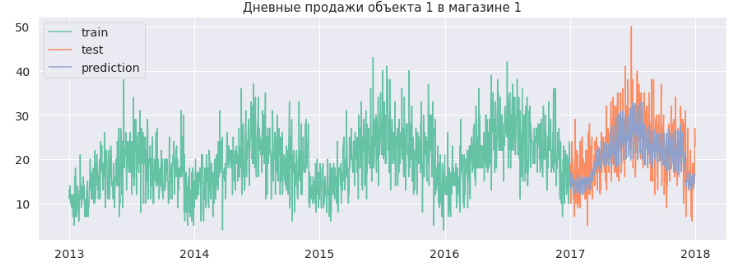


Мы знаем значения временного ряда (зеленые точки) до момента времени $ t $, в данном случае за 4 года с 2013 по 2016 включительно. Предположим, что сейчас наступил Новый год 2017. В этот момент мы хотим предсказать будущие значения ряда (оранжевая линия) на протяжении всего 2017 года на основе четырехлетней истории продаж.

Основная идея заключается в том, чтобы подать известные значения ряда (зеленые точки) в регрессионную функцию, чтобы получить предсказания. При этом мы можем использовать не все известные значения ряда, а только $ p $ последних значений. Иными словами, модель имеет вид:
$$ y_t = f(y_{t-1}, \ldots, y_{t-p}), $$
где $ f $ – произвольная функция. Её можно построить с использованием известных методов машинного обучения, таких как линейная регрессия, решающие деревья, бустинги, нейронные сети (включая сверточные и рекуррентные).

Для того чтобы выбрать подходящую модель и определить, какие признаки подавать на вход регрессии, необходимо учитывать характеристики временного ряда, такие как сезонность, тренды, и возможно другие факторы, влияющие на изменение продаж товара в магазине.


### Признаки

#### Общий принцип

На практике при генерации идей о том, какие признаки можно создавать для построения модели, рекомендуется строить следующий график. На нем нужно отметить момент времени $ t $ и мысленно поставить себя в этот момент времени. Затем нужно подумать, какие данные нам при этом доступны. В модель можно брать любые признаки, которые доступны к моменту времени $ t $. Если все данные поступают сразу, то можно брать все признаки, которые зависят только от значений до момента времени $ t $. В реальности часть данных может поступать с задержкой. Например, если данные загружаются в базу данных раз в сутки в полночь, то в полдень нам не доступны данные за последние 12 часов.



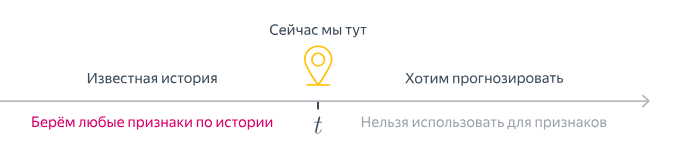

Также нужно помнить о том, на сколько времени вперед нужно сделать прогноз. Например, пусть у нас задача состоит в том, чтобы построить прогнозы продаж в магазине с целью планирования новых поставок. После того, как на основе прогноза мы примем решение о составе товаров в новой поставке, необходимо сначала собрать данные товары на складе, потом отправить машину в магазин, и затем еще разложить товар на полки в магазине. На эту процедуру может уходить от нескольких часов до нескольких дней. Тем самым еще до момента начала формирования новой поставки модель прогнозирования продаж должна построить прогноз спроса на товар к тому моменту, когда его выложат на полки.

#### Даты

Посмотрим на то, какие признаки можно извлечь из даты. Пусть дана какая-то дата: 13.04.2021 09:00. Отсюда можно получить следующие признаки:

- **день недели:** 2 (вторник);
- **месяц:** 4 (апрель);
- **год:** 2021;
- **сезон:** весна;
- **праздник:** 0 (не праздник);
- **выходной:** 0 (будний день);
- **час:** 9.

#### Предыдущие значения ряда

Например, если мы хотим построить признаки в момент времени $ t $ для прогнозирования $ y_t $, то можно рассмотреть в качестве признаков $ p $ предыдущих значений ряда $ y_{t-1}, y_{t-2}, \ldots, y_{t-p} $.



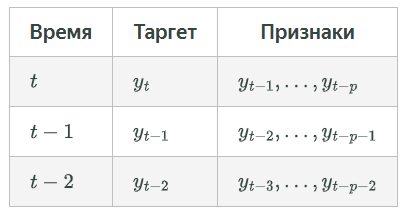


Для реализации таких признаков можно выполнить сдвиги вперед временного ряда на 1, 2, \ldots, $ p $ шагов. Например, в таблице для прогнозирования значений ряда мы рассматриваем два предыдущих значения ряда, выполняя тем самым два сдвига вперед. Таким образом, для прогнозирования значения 5 января, которое равно 235, мы берем признаки 230 и 215, которые являются значениями ряда за 4 и 3 января соответственно.

#### Конкретные числовые примеры

Пусть у нас есть временной ряд:

| Дата       | Значение $ y $ |
|------------|------------------|
| 01.01.2021 | 200              |
| 02.01.2021 | 210              |
| 03.01.2021 | 215              |
| 04.01.2021 | 230              |
| 05.01.2021 | 235              |

Для прогнозирования значения 5 января (235), используем два предыдущих значения:

- Значение 4 января: 230
- Значение 3 января: 215

Таким образом, для прогнозирования $ y_5 $ (235), наши признаки будут:

| Дата       | Таргет $ y $ | Признак 1 ($ y_{t-1} $) | Признак 2 ($ y_{t-2} $) |
|------------|----------------|--------------------------|--------------------------|
| 05.01.2021 | 235            | 230                      | 215                      |

Эти признаки помогут модели понять тенденцию временного ряда и сделать более точный прогноз.



**Скользящее окно**

Скользящее окно - это метод, который позволяет учитывать предыдущие значения временного ряда, не добавляя избыточное количество признаков. Вместо использования всех предыдущих значений ряда в качестве отдельных признаков, можно агрегировать их, используя различные статистические методы. Это позволяет уменьшить размерность задачи и выделить ключевые характеристики временного ряда.

### Конкретные числовые примеры:

#### 1. Среднее

Для временного ряда $ y_t $ с шагом 1 секунда, если хотим учитывать изменения за последние 10 секунд (период $ p = 10 $):

$$ \text{Среднее} = \frac{y_{t-1} + y_{t-2} + \ldots + y_{t-10}}{10} $$

**Пример:** $ y = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] $
$$ \text{Среднее} = \frac{2 + 4 + 6 + 8 + 10 + 12 + 14 + 16 + 18 + 20}{10} = 11 $$

#### 2. Взвешенное среднее

Взвешенное среднее может учитывать, что более близкие значения имеют больший вес:

$$ \text{Взвешенное среднее} = \frac{w_1 y_{t-1} + w_2 y_{t-2} + \ldots + w_{10} y_{t-10}}{w_1 + w_2 + \ldots + w_{10}} $$

**Пример:** веса $ w = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] $
$$ \text{Взвешенное среднее} = \frac{1 \cdot 2 + 2 \cdot 4 + 3 \cdot 6 + \ldots + 10 \cdot 20}{1 + 2 + 3 + \ldots + 10} = \frac{770}{55} \approx 14 $$

#### 3. Экспоненциальное сглаживание

Экспоненциальное сглаживание придает больший вес более последним значениям:

$$ \text{Сглаженное значение} = \alpha y_{t-1} + (1 - \alpha) \text{Сглаженное значение}_{t-1} $$

**Пример:** $\alpha = 0.3$, $ y = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] $
- $ \text{Сглаженное значение}_1 = y_1 = 2 $
- $ \text{Сглаженное значение}_2 = 0.3 \cdot 4 + 0.7 \cdot 2 = 2.6 $
- $ \text{Сглаженное значение}_3 = 0.3 \cdot 6 + 0.7 \cdot 2.6 = 3.62 $
- и т.д.

#### 4. Медиана

Медиана учитывает центральное значение периода $ p $:

**Пример:** $ y = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] $
$$ \text{Медиана} = 11 $$ (поскольку медиана между 10 и 12)

#### 5. Минимум/Максимум

**Пример:**
$$ \text{Минимум} = \min(2, 4, 6, 8, 10, 12, 14, 16, 18, 20) = 2 $$
$$ \text{Максимум} = \max(2, 4, 6, 8, 10, 12, 14, 16, 18, 20) = 20 $$

#### 6. Стандартное отклонение

**Пример:** $ y = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] $

Среднее значение = 11
$$ \text{Стандартное отклонение} = \sqrt{\frac{(2-11)^2 + (4-11)^2 + \ldots + (20-11)^2}{10}} \approx 5.92 $$

### Примеры использования в прогнозировании:

- **Средняя температура на прошлой неделе для предсказания температуры на завтра:**
  $$ \text{Средняя температура} = \frac{\text{Температура}_{т-1} + \text{Температура}_{т-2} + \ldots + \text{Температура}_{т-7}}{7} $$
  **Конкретный пример:** Если температуры на прошлой неделе были $ [20, 21, 19, 22, 20, 23, 24] $, то средняя = 21.3.

- **Средняя влажность на прошлой неделе для предсказания температуры на завтра:**
  $$ \text{Средняя влажность} = \frac{\text{Влажность}_{т-1} + \text{Влажность}_{т-2} + \ldots + \text{Влажность}_{т-7}}{7} $$
  **Конкретный пример:** Если влажность на прошлой неделе была $ [60, 65, 58, 62, 64, 66, 63] $, то средняя = 62.57.

Если в задаче данные хорошие и удаётся использовать стандартные признаки, можно воспользоваться готовыми инструментами. Например, библиотеки Python, такие как Pandas и Scikit-learn, предоставляют мощные средства для расчета этих статистик. Если данные не очень приятные, стоит подумать над тем, какие признаки использовать и как реализовать их получение, возможно, адаптируя методы под конкретные особенности данных.



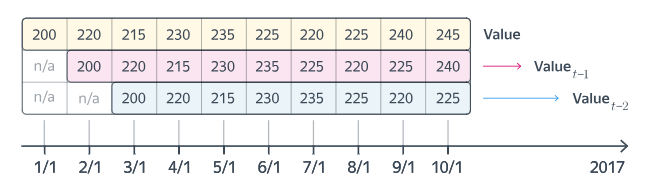

### Сезонность

Если во временном ряду наблюдается сезонность, то стоит использовать сезонные признаки. Например, следующие:

- Значение переменной сутки/неделю/месяц/год назад. Такие факторы также можно усреднять.
- Сезонность, полученная методами декомпозирования ряда (об этом расскажем ниже).

#### Примеры

1. **Значение температуры год назад**.
   
   Пусть 23 ноября 2023 года, и мы прогнозируем температуру на эту дату. Значение температуры 23 ноября 2022 года было 5°C. Это значение можно использовать как признак.

2. **Среднее значение температуры 23 ноября за 5 последних лет**.

   Если температуры 23 ноября за последние 5 лет были следующие:
   - 2018: 4°C
   - 2019: 6°C
   - 2020: 5°C
   - 2021: 7°C
   - 2022: 5°C

   Среднее значение температуры:
   $$ \text{Среднее} = \frac{4 + 6 + 5 + 7 + 5}{5} = 5.4°C $$

3. **Среднее значение температуры за 5 последних лет на неделе, в которую входит 23 ноября**.

   Если температуры на неделе (17-23 ноября) за последние 5 лет были следующие:
   - 2018: [3°C, 4°C, 5°C, 4°C, 6°C, 5°C, 4°C]
   - 2019: [6°C, 5°C, 4°C, 6°C, 5°C, 7°C, 6°C]
   - 2020: [5°C, 4°C, 6°C, 5°C, 5°C, 6°C, 5°C]
   - 2021: [7°C, 6°C, 5°C, 7°C, 6°C, 8°C, 7°C]
   - 2022: [5°C, 4°C, 5°C, 6°C, 5°C, 6°C, 5°C]

   Среднее значение температуры за неделю:
   $$ \text{Среднее} = \frac{\sum_{\text{все дни}} \text{температура}}{35} = \frac{125}{35} \approx 5.71°C $$

### Счётчики

Идея состоит в том, чтобы группировать данные не только по временным факторам, но и по любым категориальным. Например, пусть сегодня нет ветра. Тогда в качестве признака можно рассмотреть среднюю температуру в безветренные дни по историческим данным.

#### Примеры

1. **Средняя температура в безветренные дни по историческим данным**.

   Если безветренные дни были следующие и их температуры:
   - 20.10.2022: 10°C
   - 25.10.2022: 12°C
   - 30.10.2022: 11°C
   - 05.11.2022: 9°C

   Средняя температура:
   $$ \text{Среднее} = \frac{10 + 12 + 11 + 9}{4} = 10.5°C $$

2. **Средняя температура в безветренные дни в апреле по историческим данным**.

   Если в апреле за последние 3 года были следующие безветренные дни и их температуры:
   - 10.04.2021: 15°C
   - 12.04.2021: 14°C
   - 15.04.2022: 13°C
   - 20.04.2023: 16°C

   Средняя температура:
   $$ \text{Среднее} = \frac{15 + 14 + 13 + 16}{4} = 14.5°C $$

### Реализация на практике

Чтобы использовать эти признаки на практике, необходимо учитывать доступность данных в момент времени $ t $ и правильно организовать вычисление этих признаков, основываясь на исторических данных.

#### Пример использования признаков для прогноза:

Пусть у нас есть временной ряд с данными о температуре, и нам нужно прогнозировать температуру на 23 ноября 2023 года. Мы можем использовать следующие признаки:

- Температура 23 ноября 2022 года: 5°C
- Средняя температура 23 ноября за последние 5 лет: 5.4°C
- Средняя температура за неделю, в которую входит 23 ноября за последние 5 лет: 5.71°C
- Средняя температура в безветренные дни за все время: 10.5°C
- Средняя температура в безветренные дни в апреле: 14.5°C

Эти признаки помогут модели учесть сезонные и другие временные факторы для более точного прогноза.


**Резюме**
Подведем итог о том, какие признаки можем использовать для построения нашей модели.

- Используются только данные из прошлого, никакие данные из будущего нельзя использовать при прогнозировании. Нужно также учитывать возможные задержки в поступлении данных.
- Большое количество признаков может привести к вычислительным затратам.
Можно генерировать и другие признаки с учетом знаний о предметной области.

## Построение прогноза.
Мы определились с тем, какие брать признаки. Теперь разберемся с тем, как прогнозировать. Пусть требуется построить прогноз на $H$ шагов вперед. Выделяют три основных способа построить прогнозы:
- Рекурсивная стратегия;
- Прямая стратегия;
- Гибридная стратегия.

### Рекурсивная стратегия
Для каждого момента времени $t_0 \leq t \leq T$ создается объект обучающей выборки:
- Признаковое описание – история ряда до момента времени $t-1$.
- Целевая метка – значение $y_t$.

По этим данным мы обучаем какую-либо регрессионную модель строить прогнозы на один шаг вперед. При построении прогноза на несколько шагов вперед мы сначала построим прогноз на один шаг. Затем – на второй шаг, используя полученный прогноз на первый шаг в качестве признаков, и далее аналогично.

Иначе говоря, если для прогнозирования $y_t$ признаковое описание имеет вид $(y_{t-p}, \ldots, y_{t-1})$, то для построения прогноза $y_{t+1}$ рассматривается признаковое описание $(y_{t-p+1}, \ldots, y_{t-1}, \hat{y}_t)$, где $\hat{y}_t$ – это прогноз на момент времени $t$, сделанный моделью.

#### Пример
Допустим, мы хотим спрогнозировать температуру на следующие 3 дня (H = 3) на основе данных за предыдущие 5 дней (p = 5).

Данные:
- $y_{t-5} = 20$°C
- $y_{t-4} = 22$°C
- $y_{t-3} = 21$°C
- $y_{t-2} = 23$°C
- $y_{t-1} = 24$°C

Для первого шага:
- Признаковое описание: $(20, 22, 21, 23, 24)$
- Прогноз на $t$: $\hat{y}_t = 25$°C

Для второго шага:
- Признаковое описание: $(22, 21, 23, 24, 25)$
- Прогноз на $t+1$: $\hat{y}_{t+1} = 26$°C

Для третьего шага:
- Признаковое описание: $(21, 23, 24, 25, 26)$
- Прогноз на $t+2$: $\hat{y}_{t+2} = 27$°C

Итак, наши прогнозы:
- День $t$: 25°C
- День $t+1$: 26°C
- День $t+2$: 27°C


На картинке считаем, что M-2, M-1 и M это названия признаков у построенной модели.



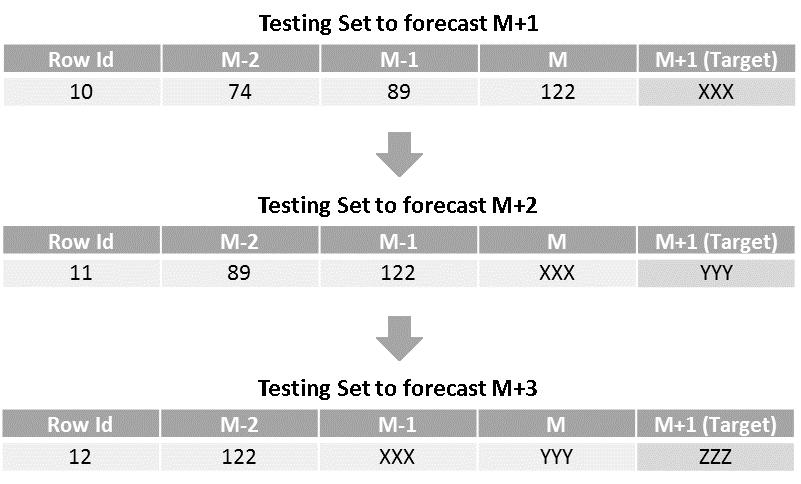

## Прямая стратегия
В прямой стратегии предполагается, что построением каждого прогноза в рамках горизонта прогнозирования должна заниматься своя модель. Тем самым создается $H$ моделей прогнозирования для каждого момента времени $t_0 \leq t \leq t_0 + H - 1$.
- Признаковое описание – история ряда до момента времени $t_0 - 1$, причем признаки одни и те же для каждой модели.
- Целевая метка – значение $y_t$.

#### Пример
Допустим, мы хотим спрогнозировать температуру на следующие 3 дня (H = 3) на основе данных за предыдущие 5 дней (p = 5).

Данные:
- $y_{t-5} = 20$°C
- $y_{t-4} = 22$°C
- $y_{t-3} = 21$°C
- $y_{t-2} = 23$°C
- $y_{t-1} = 24$°C

Модель для первого шага:
- Признаковое описание: $(20, 22, 21, 23, 24)$
- Прогноз на $t$: $\hat{y}_t = 25$°C

Модель для второго шага:
- Признаковое описание: $(20, 22, 21, 23, 24)$
- Прогноз на $t+1$: $\hat{y}_{t+1} = 26$°C

Модель для третьего шага:
- Признаковое описание: $(20, 22, 21, 23, 24)$
- Прогноз на $t+2$: $\hat{y}_{t+2} = 27$°C

Итак, наши прогнозы:
- День $t$: 25°C
- День $t+1$: 26°C
- День $t+2$: 27°C


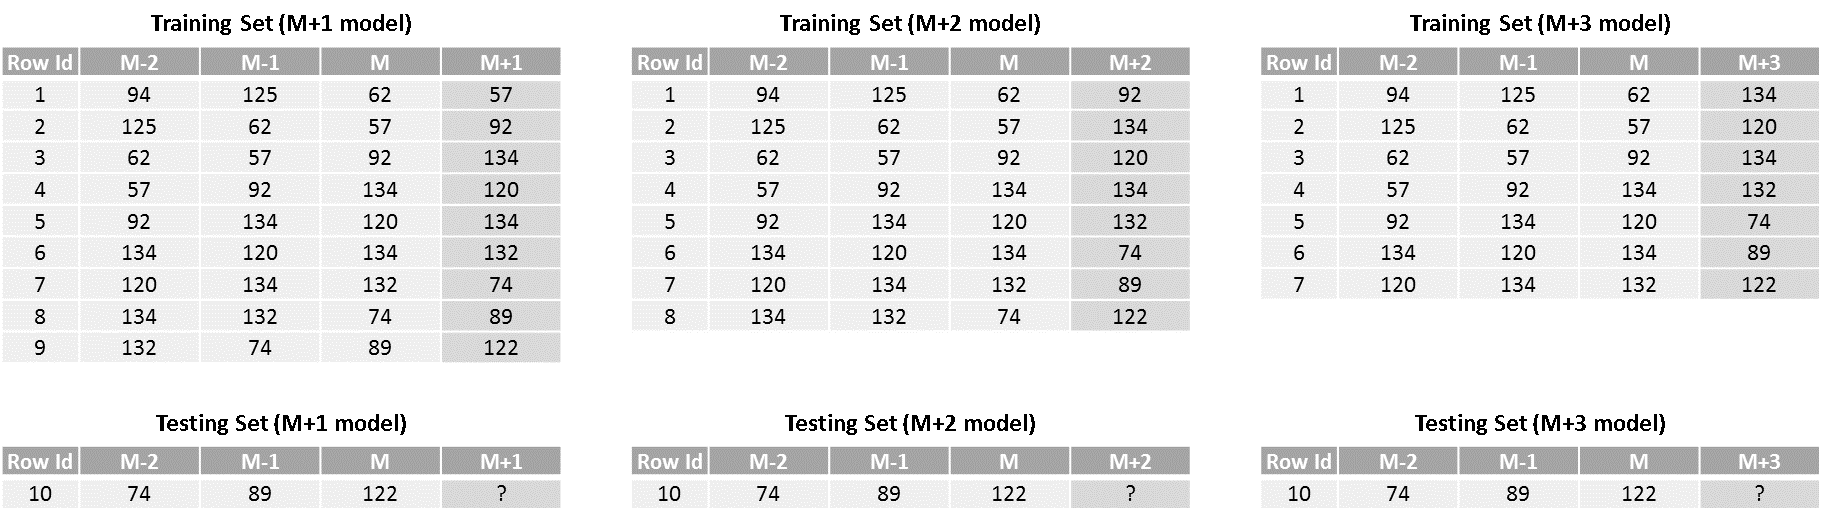


## Гибридная стратегия
Гибридная стратегия объединяет в себе преимущества рекурсивной и прямой стратегий.
Как и в прямой стратегии, создается $H$ моделей прогнозирования, но при этом каждая следующая модель использует прогнозы предыдущей подобно тому, как это делает рекурсивная стратегия.

Итак, мы должны построить:
- Модель для прогноза на 1 шаг вперед.
- Модель для прогноза на 2 шага вперед, используя прогноз уже обученной модели на 1 шаг вперед в качестве признака.
- Модель для прогноза на 3 шага вперед, используя прогноз уже обученных моделей на 1 и 2 шага вперед в качестве признаков.
- И так далее обучается $H$ моделей.

Признаковое описание:
- История ряда до момента времени $t_0 - 1$.
- Предсказания предыдущих моделей для $t_0, t_0 - 1, \ldots, t - 1$.

#### Пример
Допустим, мы хотим спрогнозировать температуру на следующие 3 дня (H = 3) на основе данных за предыдущие 5 дней (p = 5).

Данные:
- $y_{t-5} = 20$°C
- $y_{t-4} = 22$°C
- $y_{t-3} = 21$°C
- $y_{t-2} = 23$°C
- $y_{t-1} = 24$°C

Модель для первого шага:
- Признаковое описание: $(20, 22, 21, 23, 24)$
- Прогноз на $t$: $\hat{y}_t = 25$°C

Модель для второго шага:
- Признаковое описание: $(20, 22, 21, 23, 24, 25)$
- Прогноз на $t+1$: $\hat{y}_{t+1} = 26$°C

Модель для третьего шага:
- Признаковое описание: $(20, 22, 21, 23, 24, 25, 26)$
- Прогноз на $t+2$: $\hat{y}_{t+2} = 27$°C

Итак, наши прогнозы:
- День $t$: 25°C
- День $t+1$: 26°C
- День $t+2$: 27°C



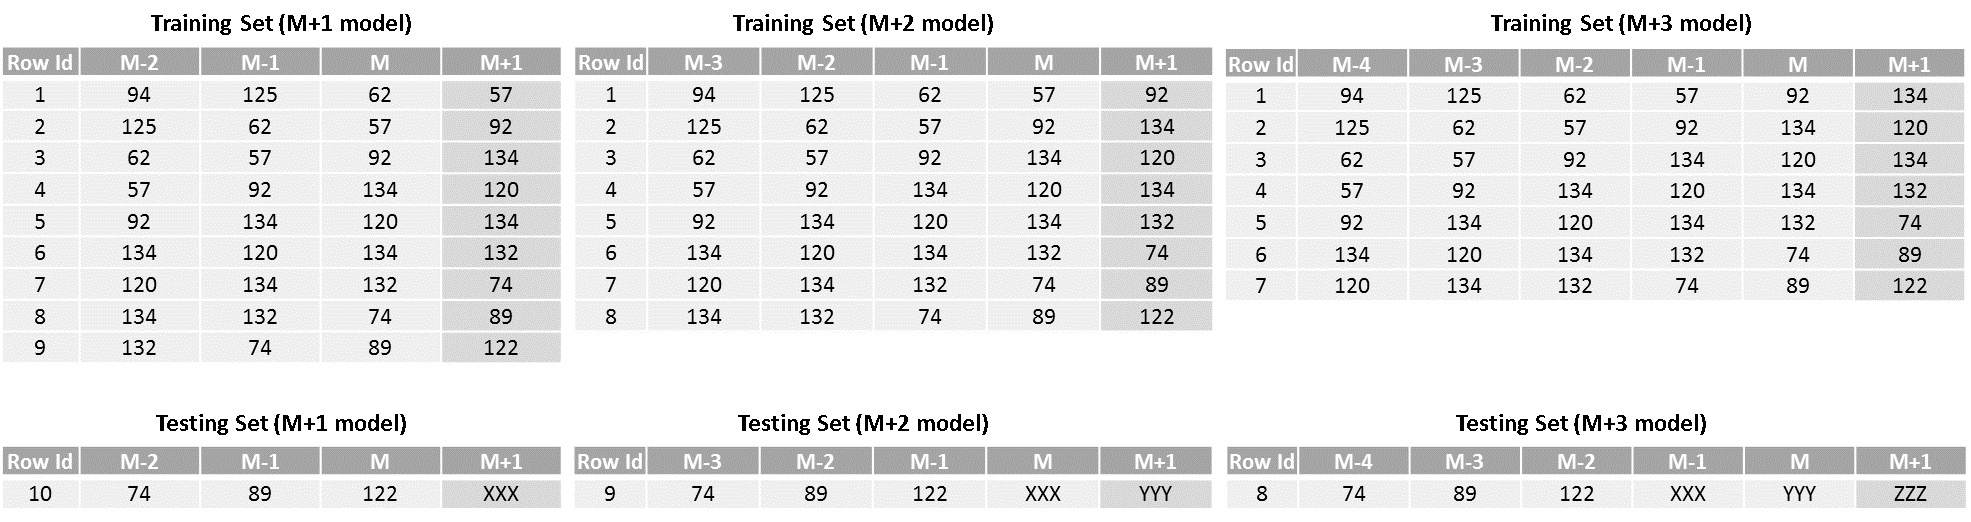

Можно задаться вопросом: что лучше брать при обучении моделей для прогноза на несколько шагов вперед – истинные значения или же предсказания предыдущих моделей? Если брать истинные, то мы можем точнее построить модели прогнозирования, но, с другой стороны, на этапе применения вы будете использовать прогнозы, а они могут иметь другое распределение, чем истинные данные, в частности, могут иметь смещение и большую дисперсию. В таком случае мы получим плохие следующие прогнозы.


Модели для нескольких временных рядов
В реальности очень часто нужно прогнозировать сразу огромное количество временных рядов.
Примеры:
•	Предсказание температуры для различных регионов/городов.
•	Предсказания уровня продаж для различных типов товаров (молоко/яблоки/мясо).
Проблема:
•	модель на каждый временной ряд – слишком много ресурсов и не масштабируемо;
•	мало моделей – плохие предсказания для каждого ряда по отдельности.
Идея: создавать модели не для каждого временного ряда, а для группы временных рядов. Иначе говоря, разделить объекты на категории, и для каждой категории создавать отдельную модель.



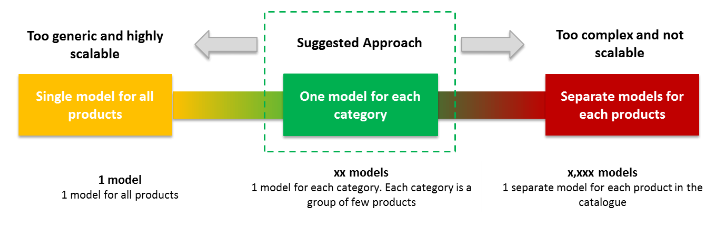

## Оценка качества моделей прогнозирования временного ряда

Для оценки качества моделей прогнозирования временного ряда в основном используются метрики качества регрессии:

- **Средняя квадратичная ошибка (MSE)**:
$$ \text{MSE} = \frac{1}{T - R + 1} \sum_{t=R}^{T} (\hat{y}_t - y_t)^2. $$
где
  - $ T $ — общее количество наблюдений (конечный момент времени).
  - $ R $ — начальный момент времени для оценки модели.
  - $ \hat{y}_t $ — предсказанное значение на момент времени $ t $.
  - $ y_t $ — фактическое (реальное) значение на момент времени $ t $.

- **Средняя абсолютная ошибка (MAE)**:
$$ \text{MAE} = \frac{1}{T - R + 1} \sum_{t=R}^{T} |\hat{y}_t - y_t|. $$

Эти метрики показывают, например, на сколько рублей или на сколько единиц товара мы ошибаемся.

Также могут использоваться:

- **Средняя абсолютная ошибка в процентах (MAPE)**:
$$ \text{MAPE} = \frac{100}{T - R + 1} \sum_{t=R}^{T} \left| \frac{\hat{y}_t - y_t}{y_t} \right|. $$

- **Взвешенная средняя ошибка в процентах (WAPE)**:
$$ \text{WAPE} = 100 \cdot \frac{\sum_{t=R}^{T} |\hat{y}_t - y_t|}{\sum_{t=R}^{T} |y_t|}. $$

Эти метрики достаточно популярны из-за того, что позволяют оценить качество в относительных величинах без зависимости от шкалы измерений.

Другие полезные метрики для оценки качества моделей прогнозирования временных рядов включают:

- **Коэффициент детерминации (R²)**:
$$ R^2 = 1 - \frac{\sum_{t=R}^{T} (y_t - \hat{y}_t)^2}{\sum_{t=R}^{T} (y_t - \bar{y})^2}, $$
где $\bar{y}$ — среднее значение наблюдаемых данных. Эта метрика показывает, какую долю дисперсии зависимой переменной объясняет модель.

- **Корень из средней квадратичной ошибки (RMSE)**:
$$ \text{RMSE} = \sqrt{\text{MSE}}. $$
Эта метрика дает ту же информацию, что и MSE, но в тех же единицах, что и прогнозируемая величина, что может облегчить интерпретацию.

- **Симметричная средняя абсолютная процентная ошибка (sMAPE)**:
$$ \text{sMAPE} = \frac{100\%}{T - R + 1} \sum_{t=R}^{T} \frac{|\hat{y}_t - y_t|}{(|y_t| + |\hat{y}_t|) / 2}. $$
Эта метрика симметрична и не склонна к преувеличению ошибок при малых значениях прогнозируемой величины.

- **Среднеквадратичный логарифмический ошибка (MSLE)**:
$$ \text{MSLE} = \frac{1}{T - R + 1} \sum_{t=R}^{T} (\log(1 + \hat{y}_t) - \log(1 + y_t))^2. $$
Эта метрика полезна, когда нам важны относительные изменения, а не абсолютные ошибки, особенно при прогнозировании временных рядов с экспоненциальным ростом.

Использование различных метрик позволяет получить более полную картину качества прогнозирования и учитывать различные аспекты ошибки модели.


## Схемы кросс-валидации

### Стандартные схемы кросс-валидации

Кросс-валидация – это техника оценки качества модели, разделяющая данные на обучающие и тестовые наборы для проверки её способности обобщать на новые данные. Существуют различные стандартные схемы кросс-валидации, среди которых наиболее распространена K-Fold кросс-валидация.

#### K-Fold кросс-валидация

K-Fold кросс-валидация делит данные на $ K $ равных частей (фолдов). Процесс выглядит следующим образом:

1. Данные делятся на $ K $ частей.
2. Для каждого фолда:
   - Одна часть выбирается как тестовый набор.
   - Оставшиеся $ K-1 $ частей используются для обучения модели.
   - Модель обучается на обучающем наборе и проверяется на тестовом наборе.
3. Процедура повторяется $ K $ раз, каждый раз с новым тестовым набором.
4. Оценка модели вычисляется как среднее значение метрик качества по всем $ K $ фолдам.

**Пример:**

Предположим, у нас есть набор данных из 100 наблюдений, и мы выбрали $ K = 5 $:

- Первая итерация: первые 20 наблюдений тестовые, оставшиеся 80 – обучающие.
- Вторая итерация: вторые 20 наблюдений тестовые, остальные 80 – обучающие.
- Процесс повторяется для всех 5 фолдов.

Эта схема помогает использовать все данные как для обучения, так и для тестирования, что увеличивает надежность оценки модели.

### Кросс-валидация для временных рядов

Кросс-валидация – это метод оценки качества моделей, который позволяет проверять, насколько хорошо модель будет работать на новых данных. Для временных рядов стандартные схемы кросс-валидации, такие как K-Fold, неприменимы, потому что значения во временных рядах зависят друг от друга и не могут перемешиваться без нарушения временной последовательности данных. Чтобы корректно учитывать временную структуру, используются специализированные методы кросс-валидации.

#### Схема 1: Скользящее (Rolling) или Расширяющееся (Expanding) окно

Этот метод заключается в том, что мы постепенно расширяем обучающую выборку, сохраняя при этом временную последовательность данных. Конкретные шаги следующие:

1. Обучаемся на первых $ t $ значениях временного ряда $ y_1, y_2, ..., y_t $, прогнозируем следующие $ \Delta t $ значений ряда $ \hat{y}_{t+1}, \hat{y}_{t+2}, ..., \hat{y}_{t+\Delta t} $.
2. Обучаемся на $ y_1, y_2, ..., y_{t+\Delta t} $, прогнозируем $ \hat{y}_{t+\Delta t+1}, \hat{y}_{t+\Delta т+2}, ..., \hat{y}_{t+2\Delta t} $.
3. Повторяем этот процесс, пока не дойдем до конца временного ряда.
4. На каждой итерации вычисляем ошибки прогноза и усредняем их.

**Пример:**

Предположим, у нас есть временной ряд с 30 значениями, и мы выбираем $ t = 10 $ и $ \Delta t = 5 $.

- Первая итерация: обучаем модель на $ y_1, y_2, ..., y_{10} $, прогнозируем $ \hat{y}_{11}, \hat{y}_{12}, ..., \hat{y}_{15} $.
- Вторая итерация: обучаем модель на $ y_1, y_2, ..., y_{15} $, прогнозируем $ \hat{y}_{16}, \hat{y}_{17}, ..., \hat{y}_{20} $.
- Третья итерация: обучаем модель на $ y_1, y_2, ..., y_{20} $, прогнозируем $ \hat{y}_{21}, \hat{y}_{22}, ..., \hat{y}_{25} $.
- Четвертая итерация: обучаем модель на $ y_1, y_2, ..., y_{25} $, прогнозируем $ \hat{y}_{26}, \hat{y}_{27}, ..., \hat{y}_{30} $.



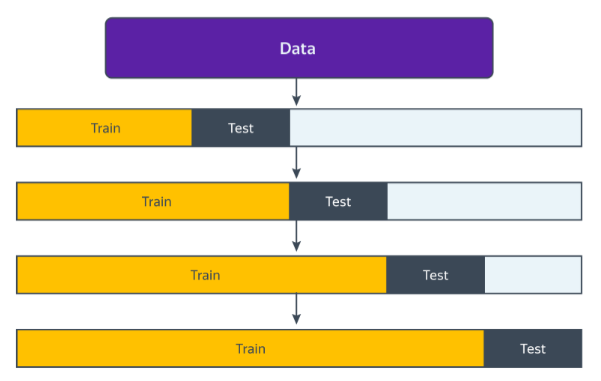

#### Схема 2: Time Series Split (Прогрессивное разбиение)

Этот метод заключается в разбиении временного ряда на несколько неперекрывающихся тренировочных и тестовых наборов. При этом каждый последующий тестовый набор временно следует за предыдущим.

1. Делим временной ряд на $ k $ частей.
2. Обучаемся на первых $ t $ частях и тестируем на $ t+1 $-й части.
3. Обучаемся на первых $ t+1 $ частях и тестируем на $ t+2 $-й части.
4. Повторяем до тех пор, пока не будут использованы все части.

**Пример:**

Предположим, у нас есть временной ряд с 30 значениями, и мы выбираем $ k = 5 $ частей.

- Первая итерация: обучаем модель на первых 6 значениях, тестируем на 7-ю часть.
- Вторая итерация: обучаем модель на первых 12 значениях, тестируем на 13-ю часть.
- Третья итерация: обучаем модель на первых 18 значениях, тестируем на 19-ю часть.
- Четвертая итерация: обучаем модель на первых 24 значениях, тестируем на 25-ю часть.

На каждой итерации мы сохраняем ошибки прогноза, чтобы затем усреднить их и получить общее представление о качестве модели.




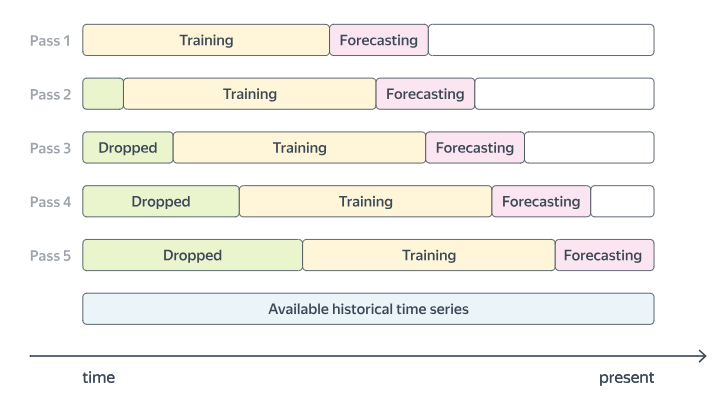

Эти две схемы отличаются только размером обучающего множества. В первом случае он постоянно растет, во втором – не меняется, а само обучающее множество при этом сдвигается. Ту или иную схему на практике стоит использовать в зависимости от того, какая решается задача. Например, если данных достаточно много и предполагается онлайн работа модели с периодическим дообучением, то обычно при каждом дообучении размер обучающего множества фиксируют. В таком случае имеет смысл воспользоваться второй схемой, чтобы оценить качество модели, обученной именно на таким количестве данных. Если же данных немного, то для обучения желательно использовать все доступные данные. В таком случае имеет смысл использовать первую схему.

Обратите внимание, что во всех случаях размер тестового интервала времени фиксирован. Это необходимое условие, потому как распределение значений метрики на разных размерах данных может отличаться. Вспомните, например, про зависимость дисперсии выборочного от размера выборки.

## Резюме: стандартные модели машинного обучения для временных рядов

Стандартные модели машинного обучения (МО) представляют собой основные алгоритмы и методы, которые используются для обработки данных и создания прогностических моделей. Они разработаны для решения различных задач, таких как классификация, регрессия, кластеризация и другие, и находят широкое применение в различных областях, включая финансы, медицину, технологии и другие секторы. Среди стандартных моделей можно выделить линейные модели, деревья решений, метод ближайших соседей, нейронные сети и многие другие, каждая из которых обладает своими уникальными свойствами и применимости в различных контекстах.


#### Преимущества

1. **Использование дополнительной информации**: Стандартные модели машинного обучения для временных рядов легко интегрируют дополнительные экзогенные факторы или признаки, что улучшает качество прогнозов за счет учета внешних переменных.

2. **Множество рядов – множество моделей**: Например, нейронная сеть может иметь несколько выходов, что позволяет ей прогнозировать сразу несколько временных рядов одной моделью. Это особенно полезно для задач, где требуется прогнозирование нескольких взаимозависимых временных рядов, например, продаж различных товаров.

#### Недостатки

1. **Отсутствие прямого построения предсказательных интервалов**: Стандартные модели машинного обучения для временных рядов обычно не предоставляют возможности напрямую строить предсказательные интервалы, что усложняет оценку неопределенности прогнозов.

2. **Возможные проблемы с производительностью**: Иногда эти модели могут показывать худшие результаты по сравнению со стандартными временными рядовыми моделями, такими как ARIMA или экспоненциальное сглаживание, особенно если структура данных не соответствует предполагаемым предпосылкам.

3. **Сложности в обработке признаков**: Обработка признаков может быть более сложной по сравнению с другими моделями, рассматриваемыми далее, из-за особенностей взаимодействия с временной зависимостью данных.

4. **Интерпретация моделей может вызывать затруднения**: Понимание и интерпретация результатов моделей машинного обучения временных рядов может представлять сложности для заказчиков и пользователей из-за их комплексности и специфики подхода.
